In [43]:
from random import randint 
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageOps
from tqdm.notebook import tqdm

In [44]:
def plot(points, width=2048, height=2048, outputfile='example.png'):
  image = Image.new( 'RGB', (width, height))
  draw = ImageDraw.Draw(image)
  for x, y in points:
        draw.point((x,y))

  # image.save( outputfile, "PNG" )
  display(ImageOps.flip(image))

Jan Ilczuk

**Używana jest implementacja własna**

# Zadanie 1 Kopiarka wielokrotnie redukująca (Iterated Function System)

**1. Wygeneruj i wyświetl przykładowy obraz binarny o rozmiarze 2048×2048 pikseli.Na obrazie powinien być widoczny jeden zwarty, chiralny obiekt (np. w kształcie litery L).**

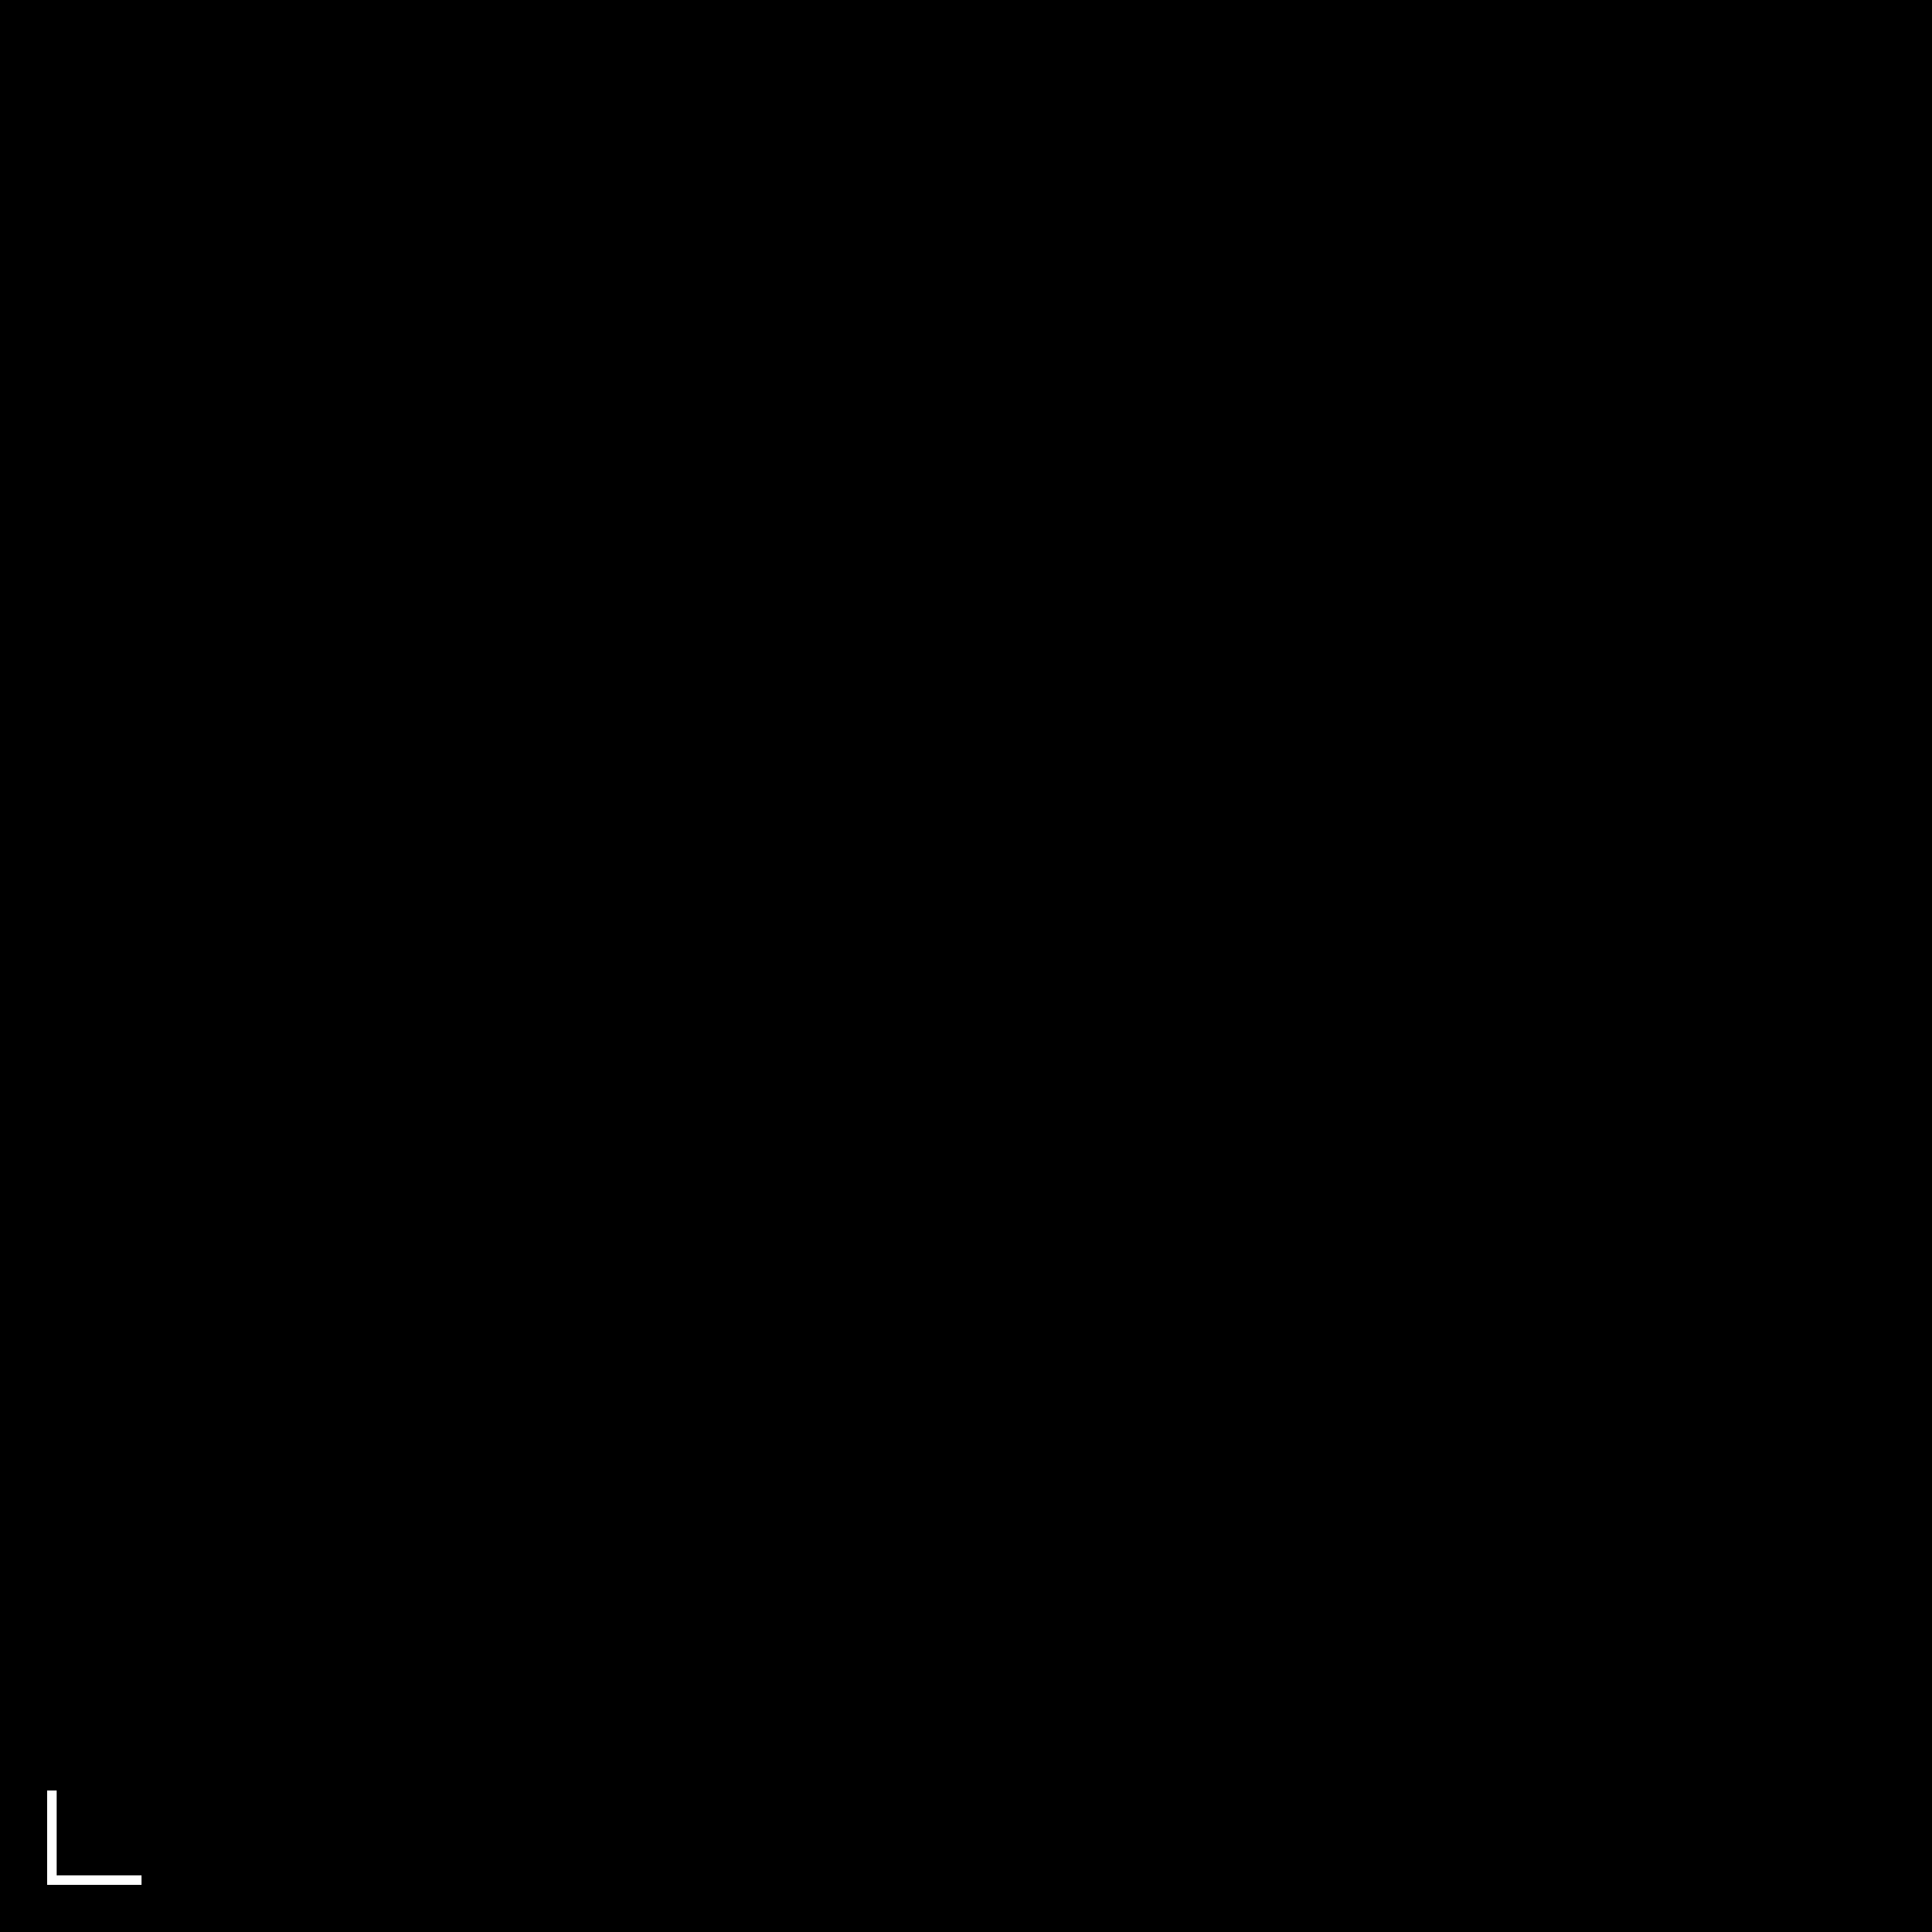

In [45]:
points = set()
for x in range(50, 60):
  for y in range(50, 150):
    points.add((x, y))

for x in range(50, 150):
  for y in range(50, 60):
    points.add((x, y))

plot(points)


transformations = [{'a': .5, 'b': 0.0, 'c': 0.0, 'd': 0.5, 'e': 0.0, 'f': 0.0},
                   {'a': .5, 'b': 0.0, 'c': 0.0, 'd': 0.5, 'e': 0.0, 'f': 0.5},
                   {'a': .5, 'b': 0.0, 'c': 0.0, 'd': 0.5, 'e': 0.5, 'f': 0.0},
                   {'a': .5, 'b': 0.0, 'c': 0.0, 'd': 0.5, 'e': 0.5, 'f': 0.5}]

**2. Dokonaj  przekształcenia  danego  obrazu  za  pomocą  jednej  dowolnej  kontrakcji  i przedstaw wynik operacji (przedstaw wizualizację rezultatu).**

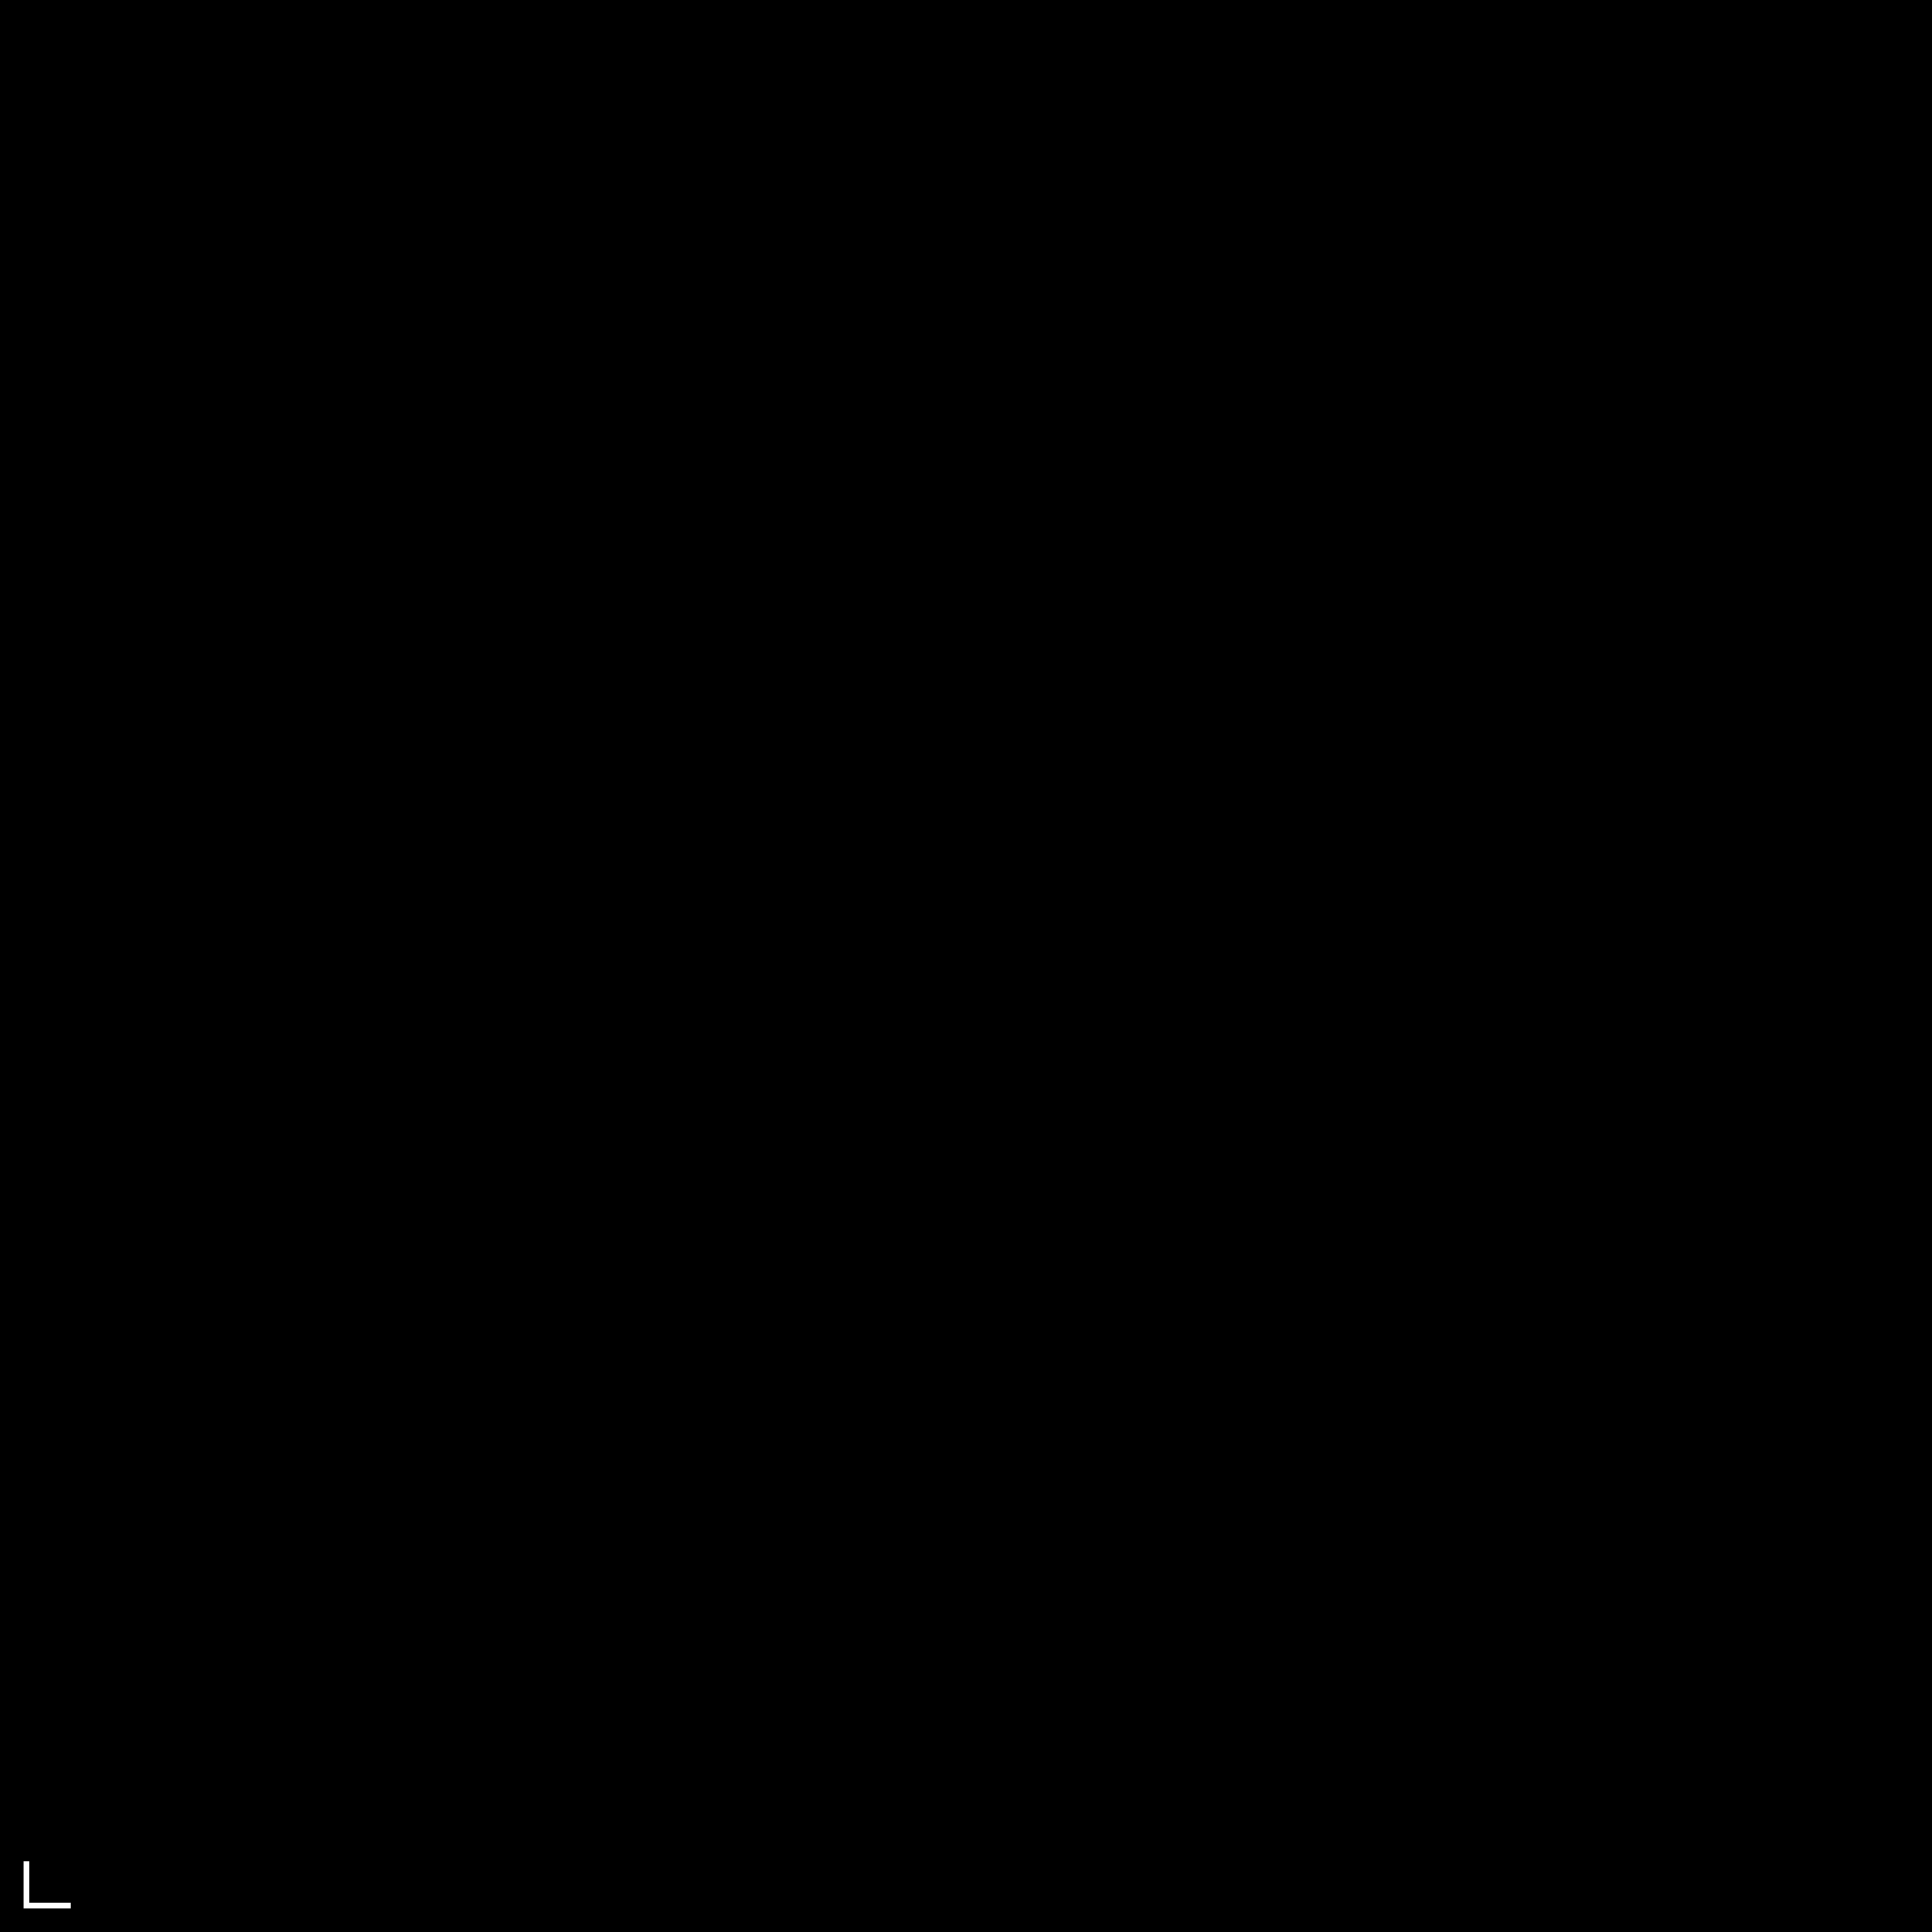

In [46]:
transformation = {'a': .5, 'b': 0.0, 'c': 0.0, 'd': 0.5, 'e': 0.0, 'f': 0.0}
width = height = 2048
new_points = set()

for point in points:
    new_x = int(round(transformation['a'] * point[0] + transformation['b'] * point[1] + transformation['e'] * width))
    new_y = int(round(transformation['c'] * point[0] + transformation['d'] * point[1] + transformation['f'] * height))
    new_points.add((new_x, new_y))

new_points

plot(new_points)

Literka L zmniejszyla się dwukrotnie

**3. Napisz funkcję pozwalającą na kompozycję od 2 do 4 kontrakcji w postaci operatora Hutchinsona. Dla danego obrazu początkowego zaprezentuj wynik działania operatora W złożonego z 3 wybranych odwzorowań afinicznych (przedstaw wizualizację rezultatu - jednokrotne zastosowanie operatora).**

Wziołem zmodyfikowany przykład z książki Fraktale - Granica Chaosu rozdział 5.3

In [47]:
transformations = [{'a': .5, 'b': 0.0, 'c': 0.0, 'd': 0.5, 'e': 0.0, 'f': 0.0},
                   {'a': .5, 'b': 0.0, 'c': 0.0, 'd': 0.5, 'e': 0.0, 'f': 0.5},
                   {'a': .5, 'b': 0.0, 'c': 0.0, 'd': 0.5, 'e': 0.5, 'f': 0.0}]

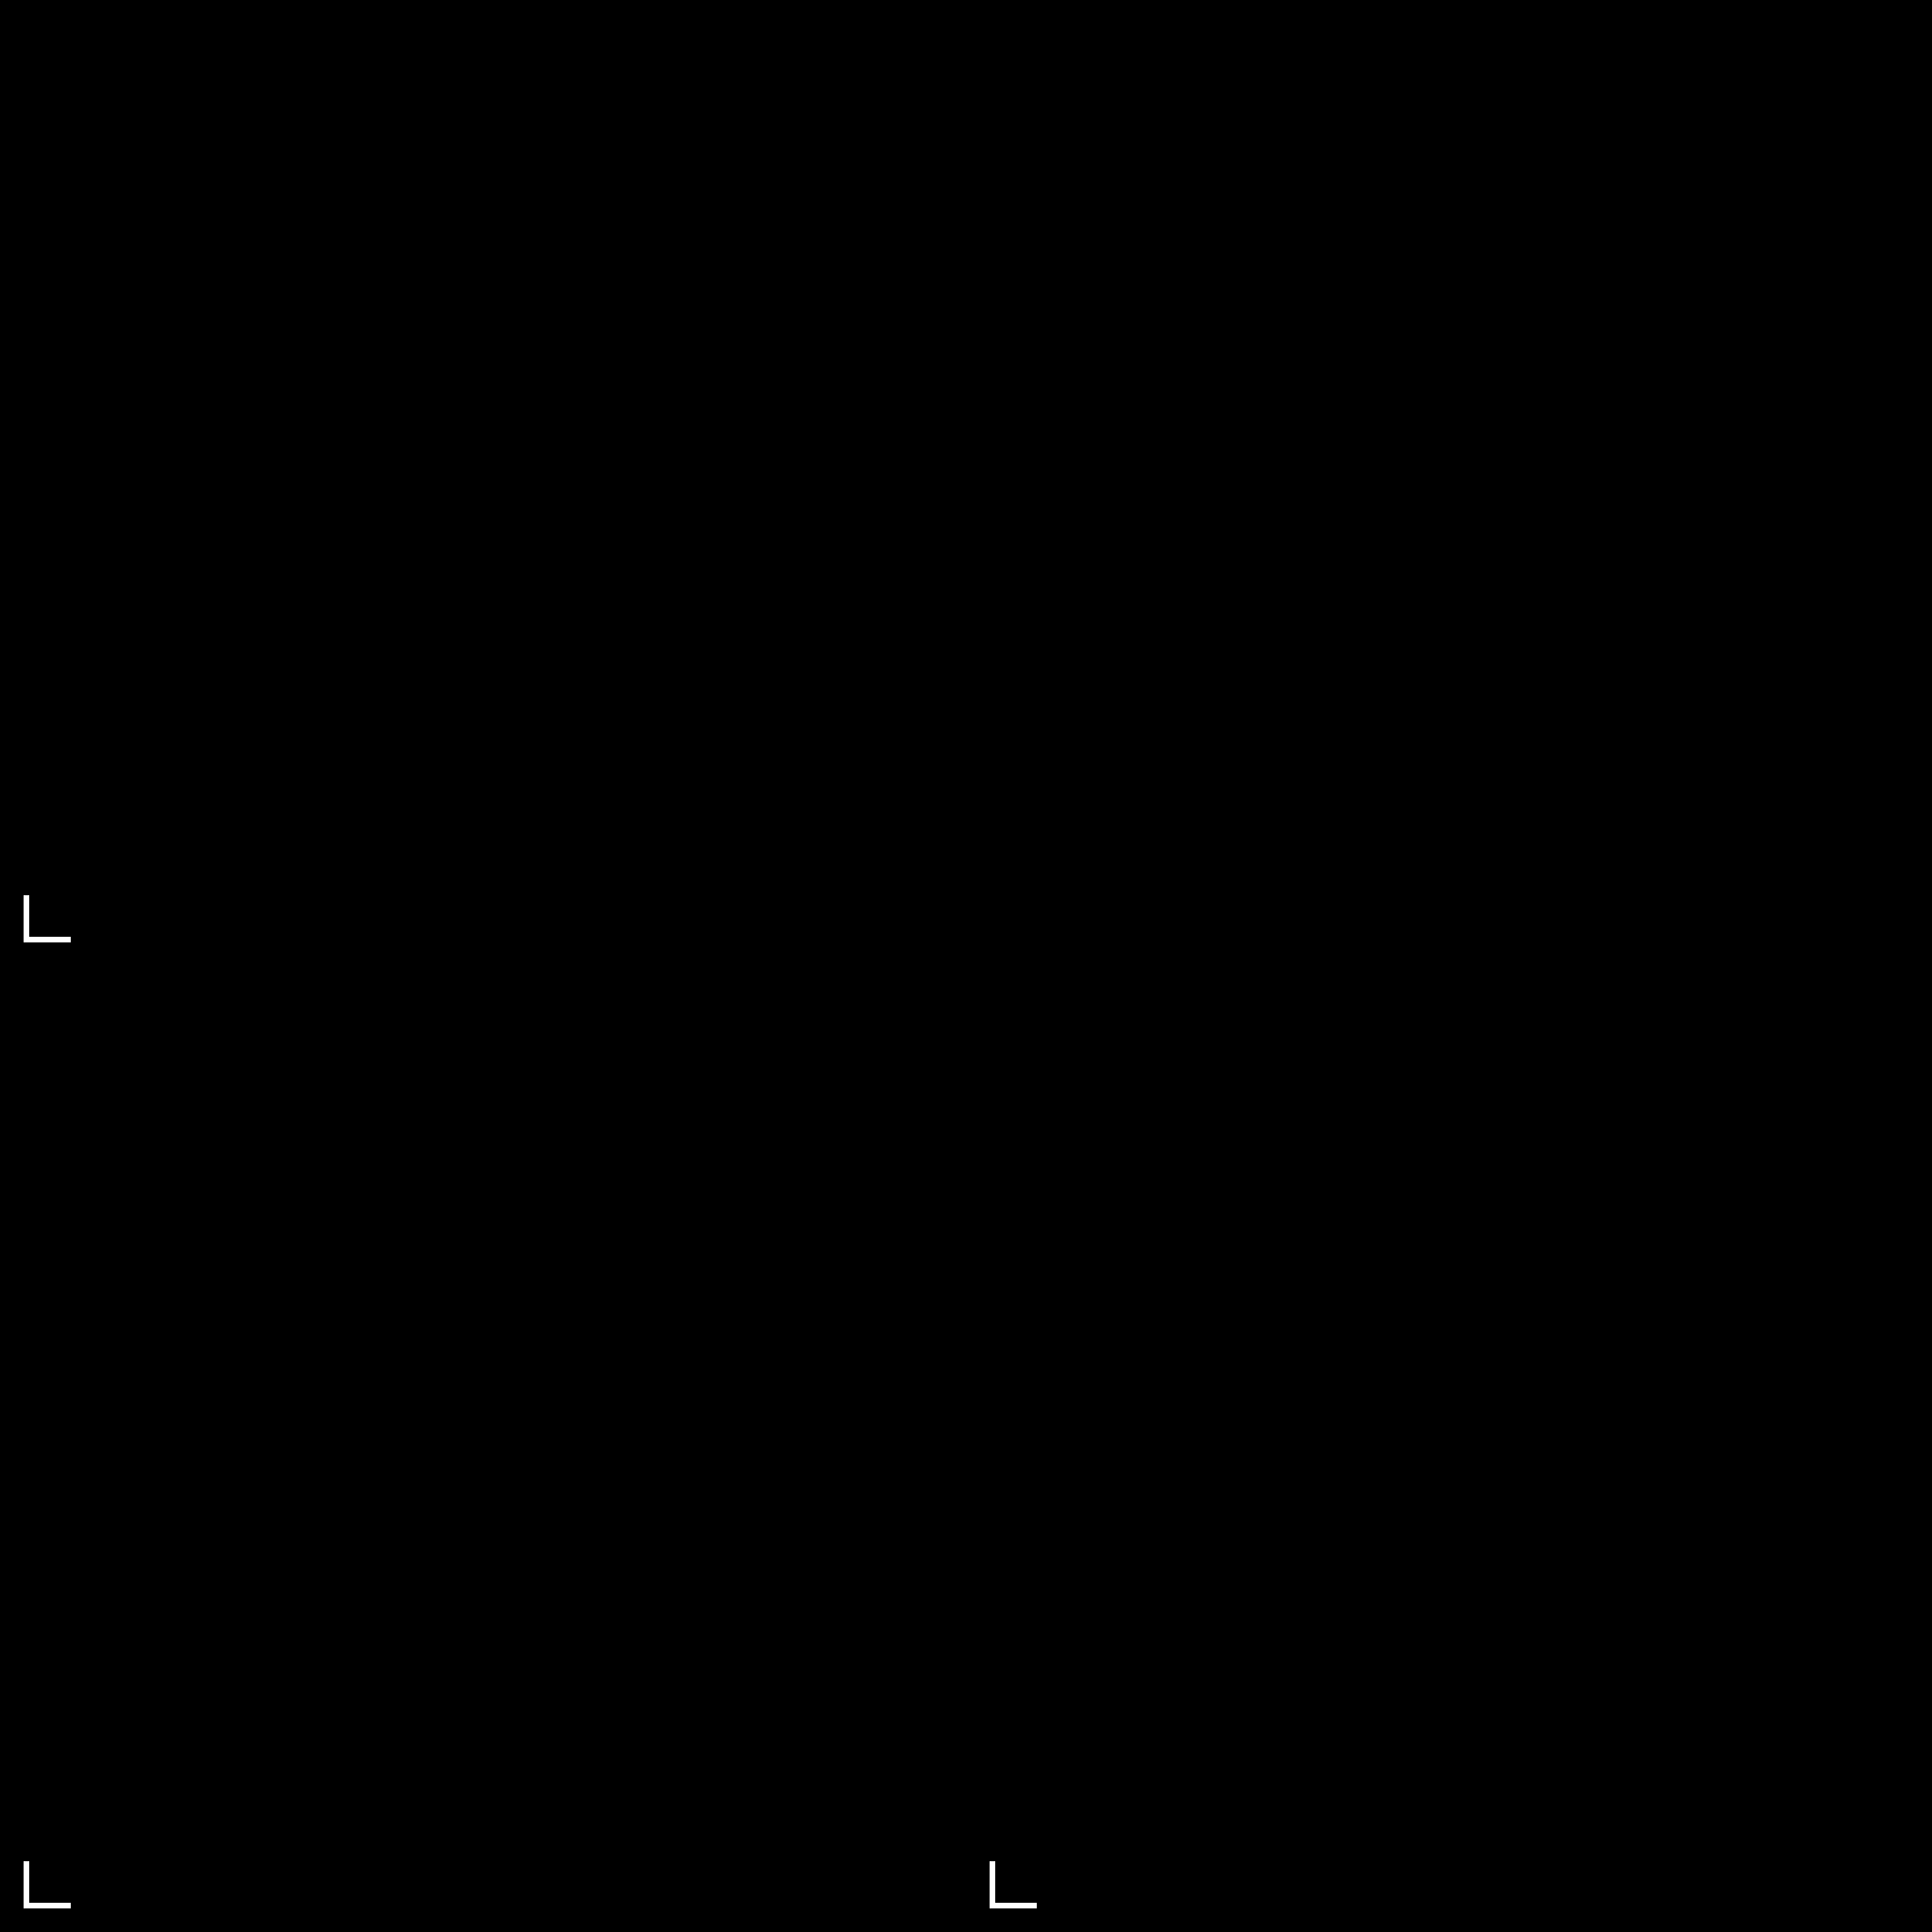

In [49]:
new_points = set()

for point in points:
    for transformation in transformations:
        new_x = int(round(transformation['a'] * point[0] + transformation['b'] * point[1] + transformation['e'] * width))
        new_y = int(round(transformation['c'] * point[0] + transformation['d'] * point[1] + transformation['f'] * height))
        new_points.add((new_x, new_y))

new_points

plot(new_points)

Powstały trzy literki L z jednej litery L po jednym zastosowania operatora

**4. Napisz funkcję pozwalającą na wykonanie zadanej liczby iteracji danego operatoraHutchinsona.**

In [50]:
 def ifs(points, transformations, width=2048, height=2048, iterations=1):
  # for each iteration
    for i in tqdm(range(iterations)):
        new_points = set()

        # for each point
        for point in points:
            for transformation in transformations:
                new_x = int(round(transformation['a'] * point[0] + transformation['b'] * point[1] + transformation['e'] * width))
                new_y = int(round(transformation['c'] * point[0] + transformation['d'] * point[1] + transformation['f'] * height))
                new_points.add((new_x, new_y))

        points = new_points

    plot(points)

In [51]:
transformations = [{'a': 0.0, 'b': -0.5, 'c': 0.5, 'd': 0.0, 'e': 0.5, 'f': 0.0},
                   {'a': 0.0, 'b': 0.5, 'c': -0.5, 'd': 0.0, 'e': 0.5, 'f': 0.5},
                   {'a': 0.5, 'b': 0.0, 'c': 0.0, 'd': 0.5, 'e': 0.25, 'f': 0.5}]

  0%|          | 0/100 [00:00<?, ?it/s]

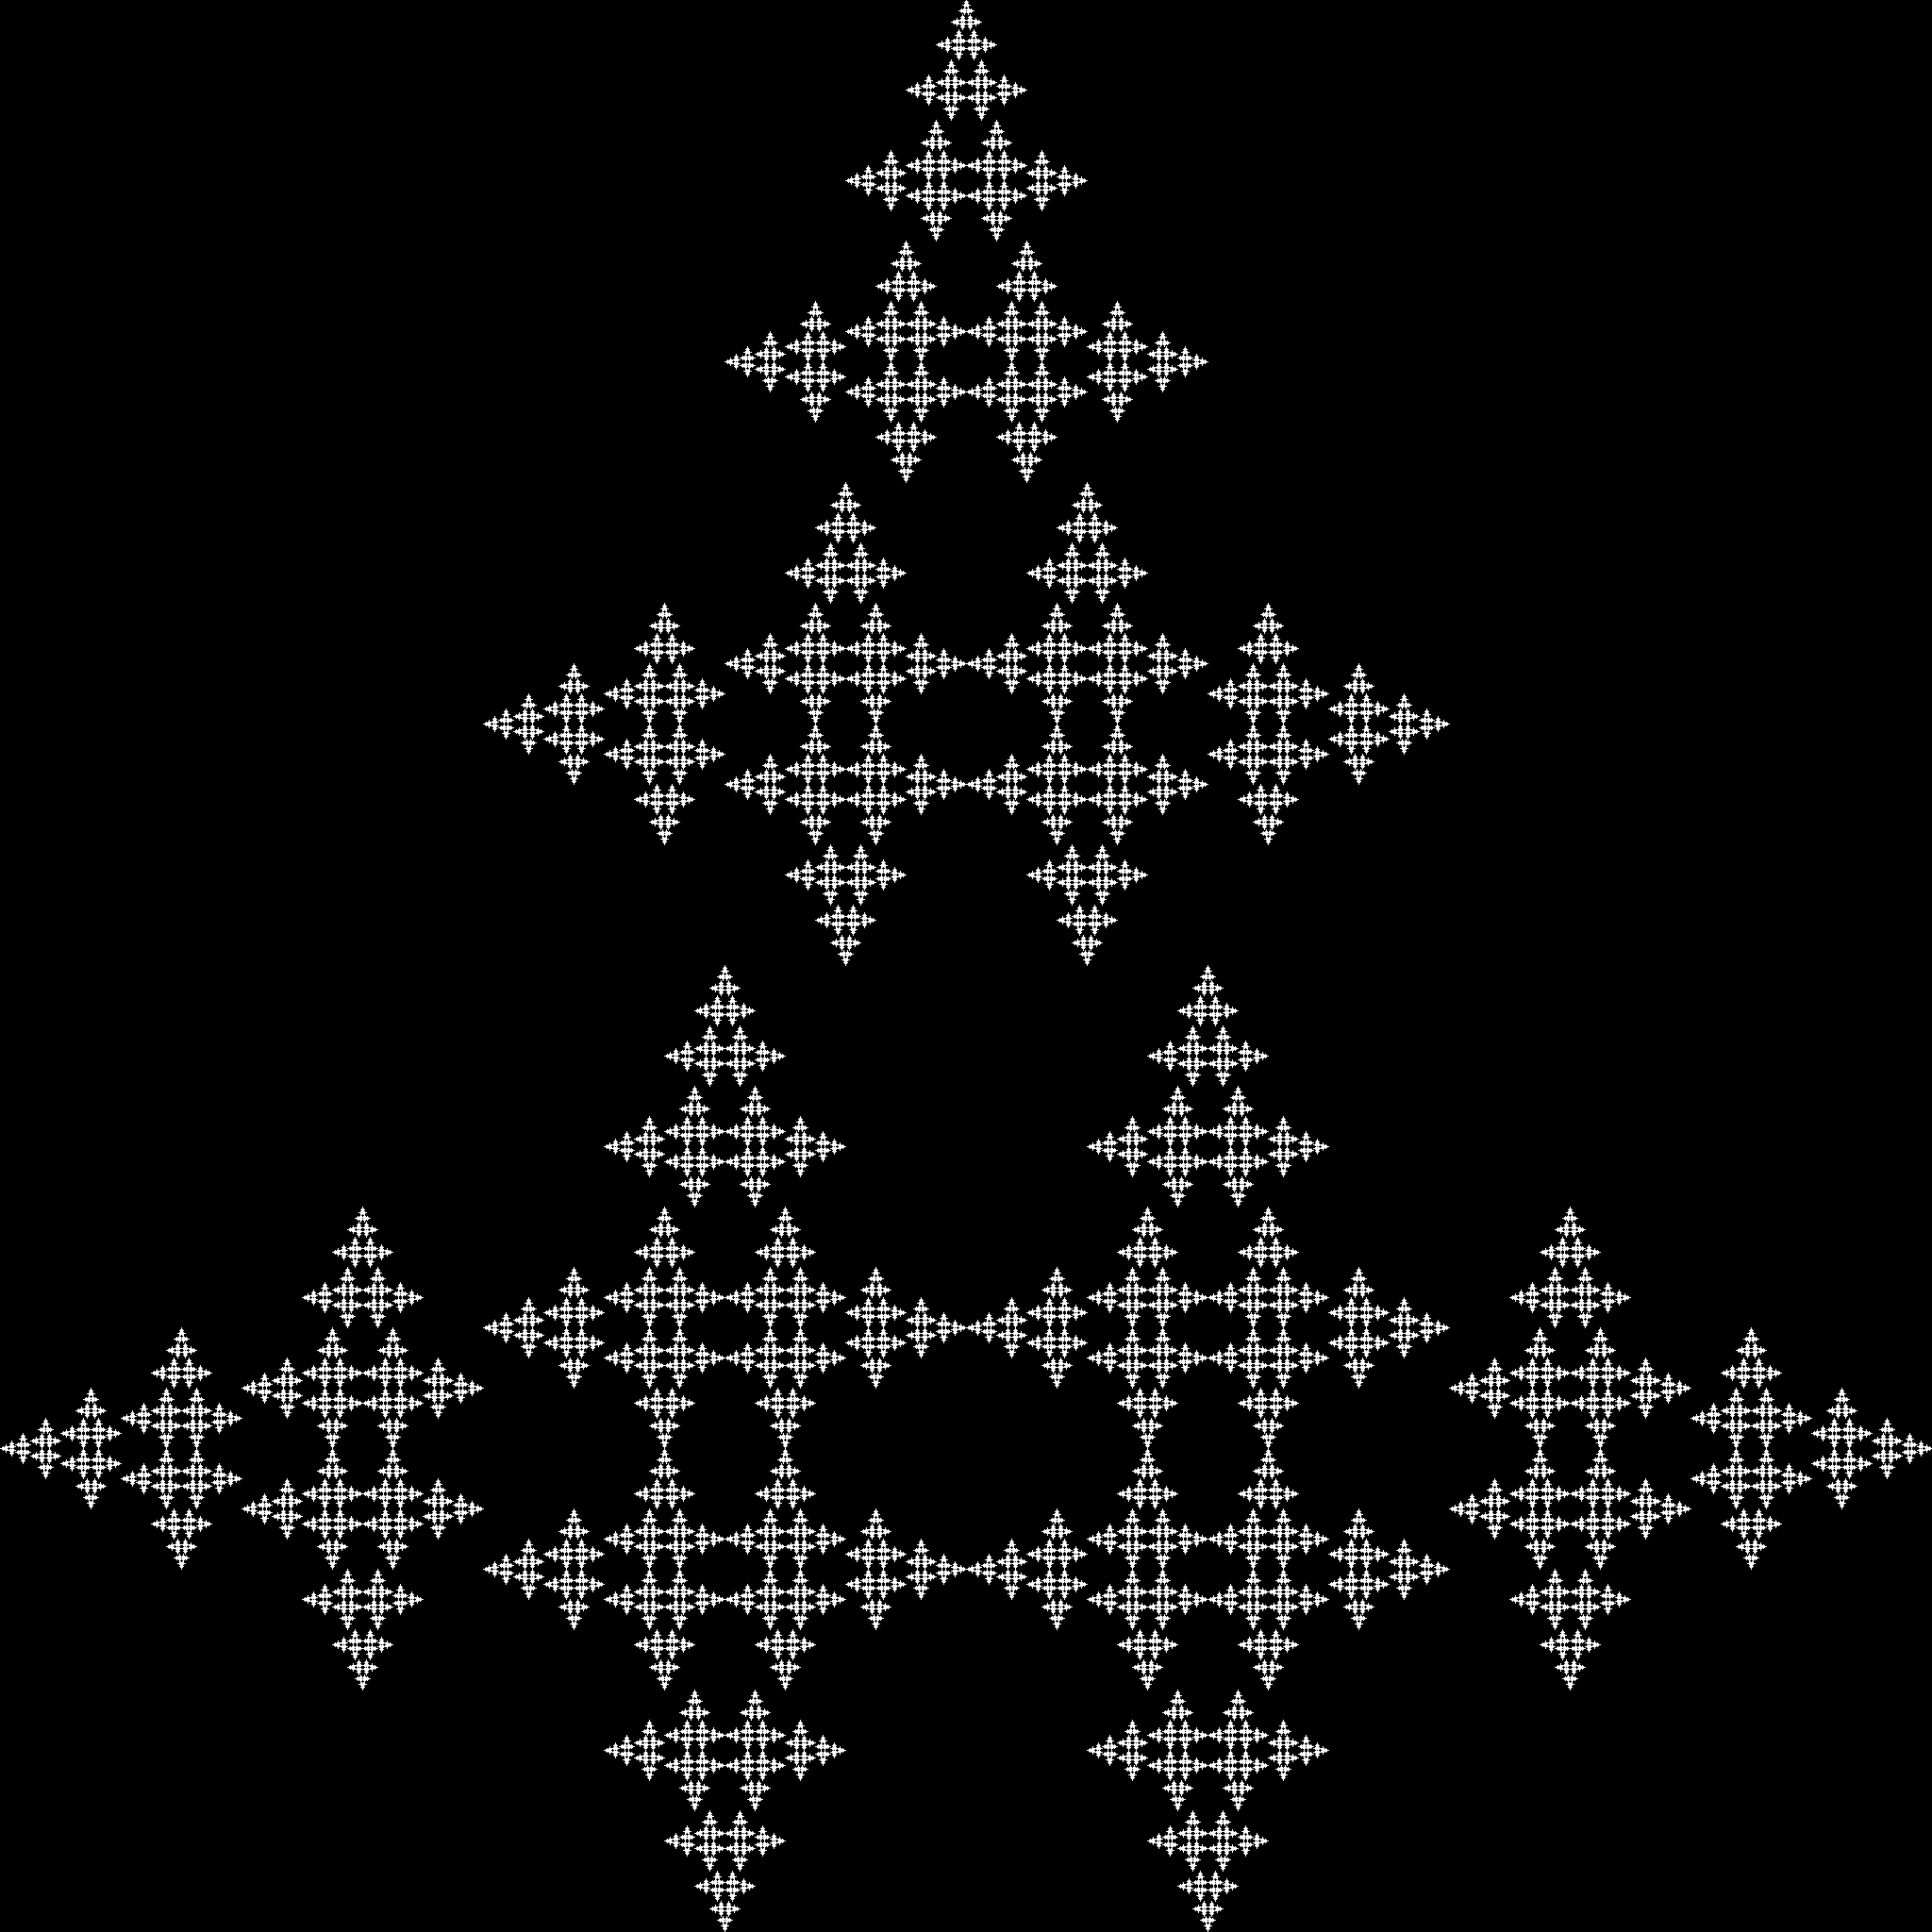

In [52]:
ifs(points, transformations, iterations=100)

Atraktor powstały jest nazywany bliźniacza choinka. (Wszystkie nazwy obiektów używam z książki Fraktale - Teoria Chaosu)

In [53]:
transformations = [{'a': 0.849, 'b': 0.037, 'c': -0.037, 'd': 0.849, 'e': 0.075, 'f': 0.1830},
                   {'a': 0.197, 'b': -0.226, 'c': 0.226, 'd': 0.197, 'e': 0.400, 'f': 0.049},
                   {'a': -0.150, 'b': 0.283, 'c': 0.260, 'd': 0.237, 'e': 0.575, 'f': -0.084},
                   {'a': 0.0, 'b': 0.0, 'c': 0.0, 'd': 0.16, 'e': 0.500, 'f': 0.040}]

  0%|          | 0/100 [00:00<?, ?it/s]

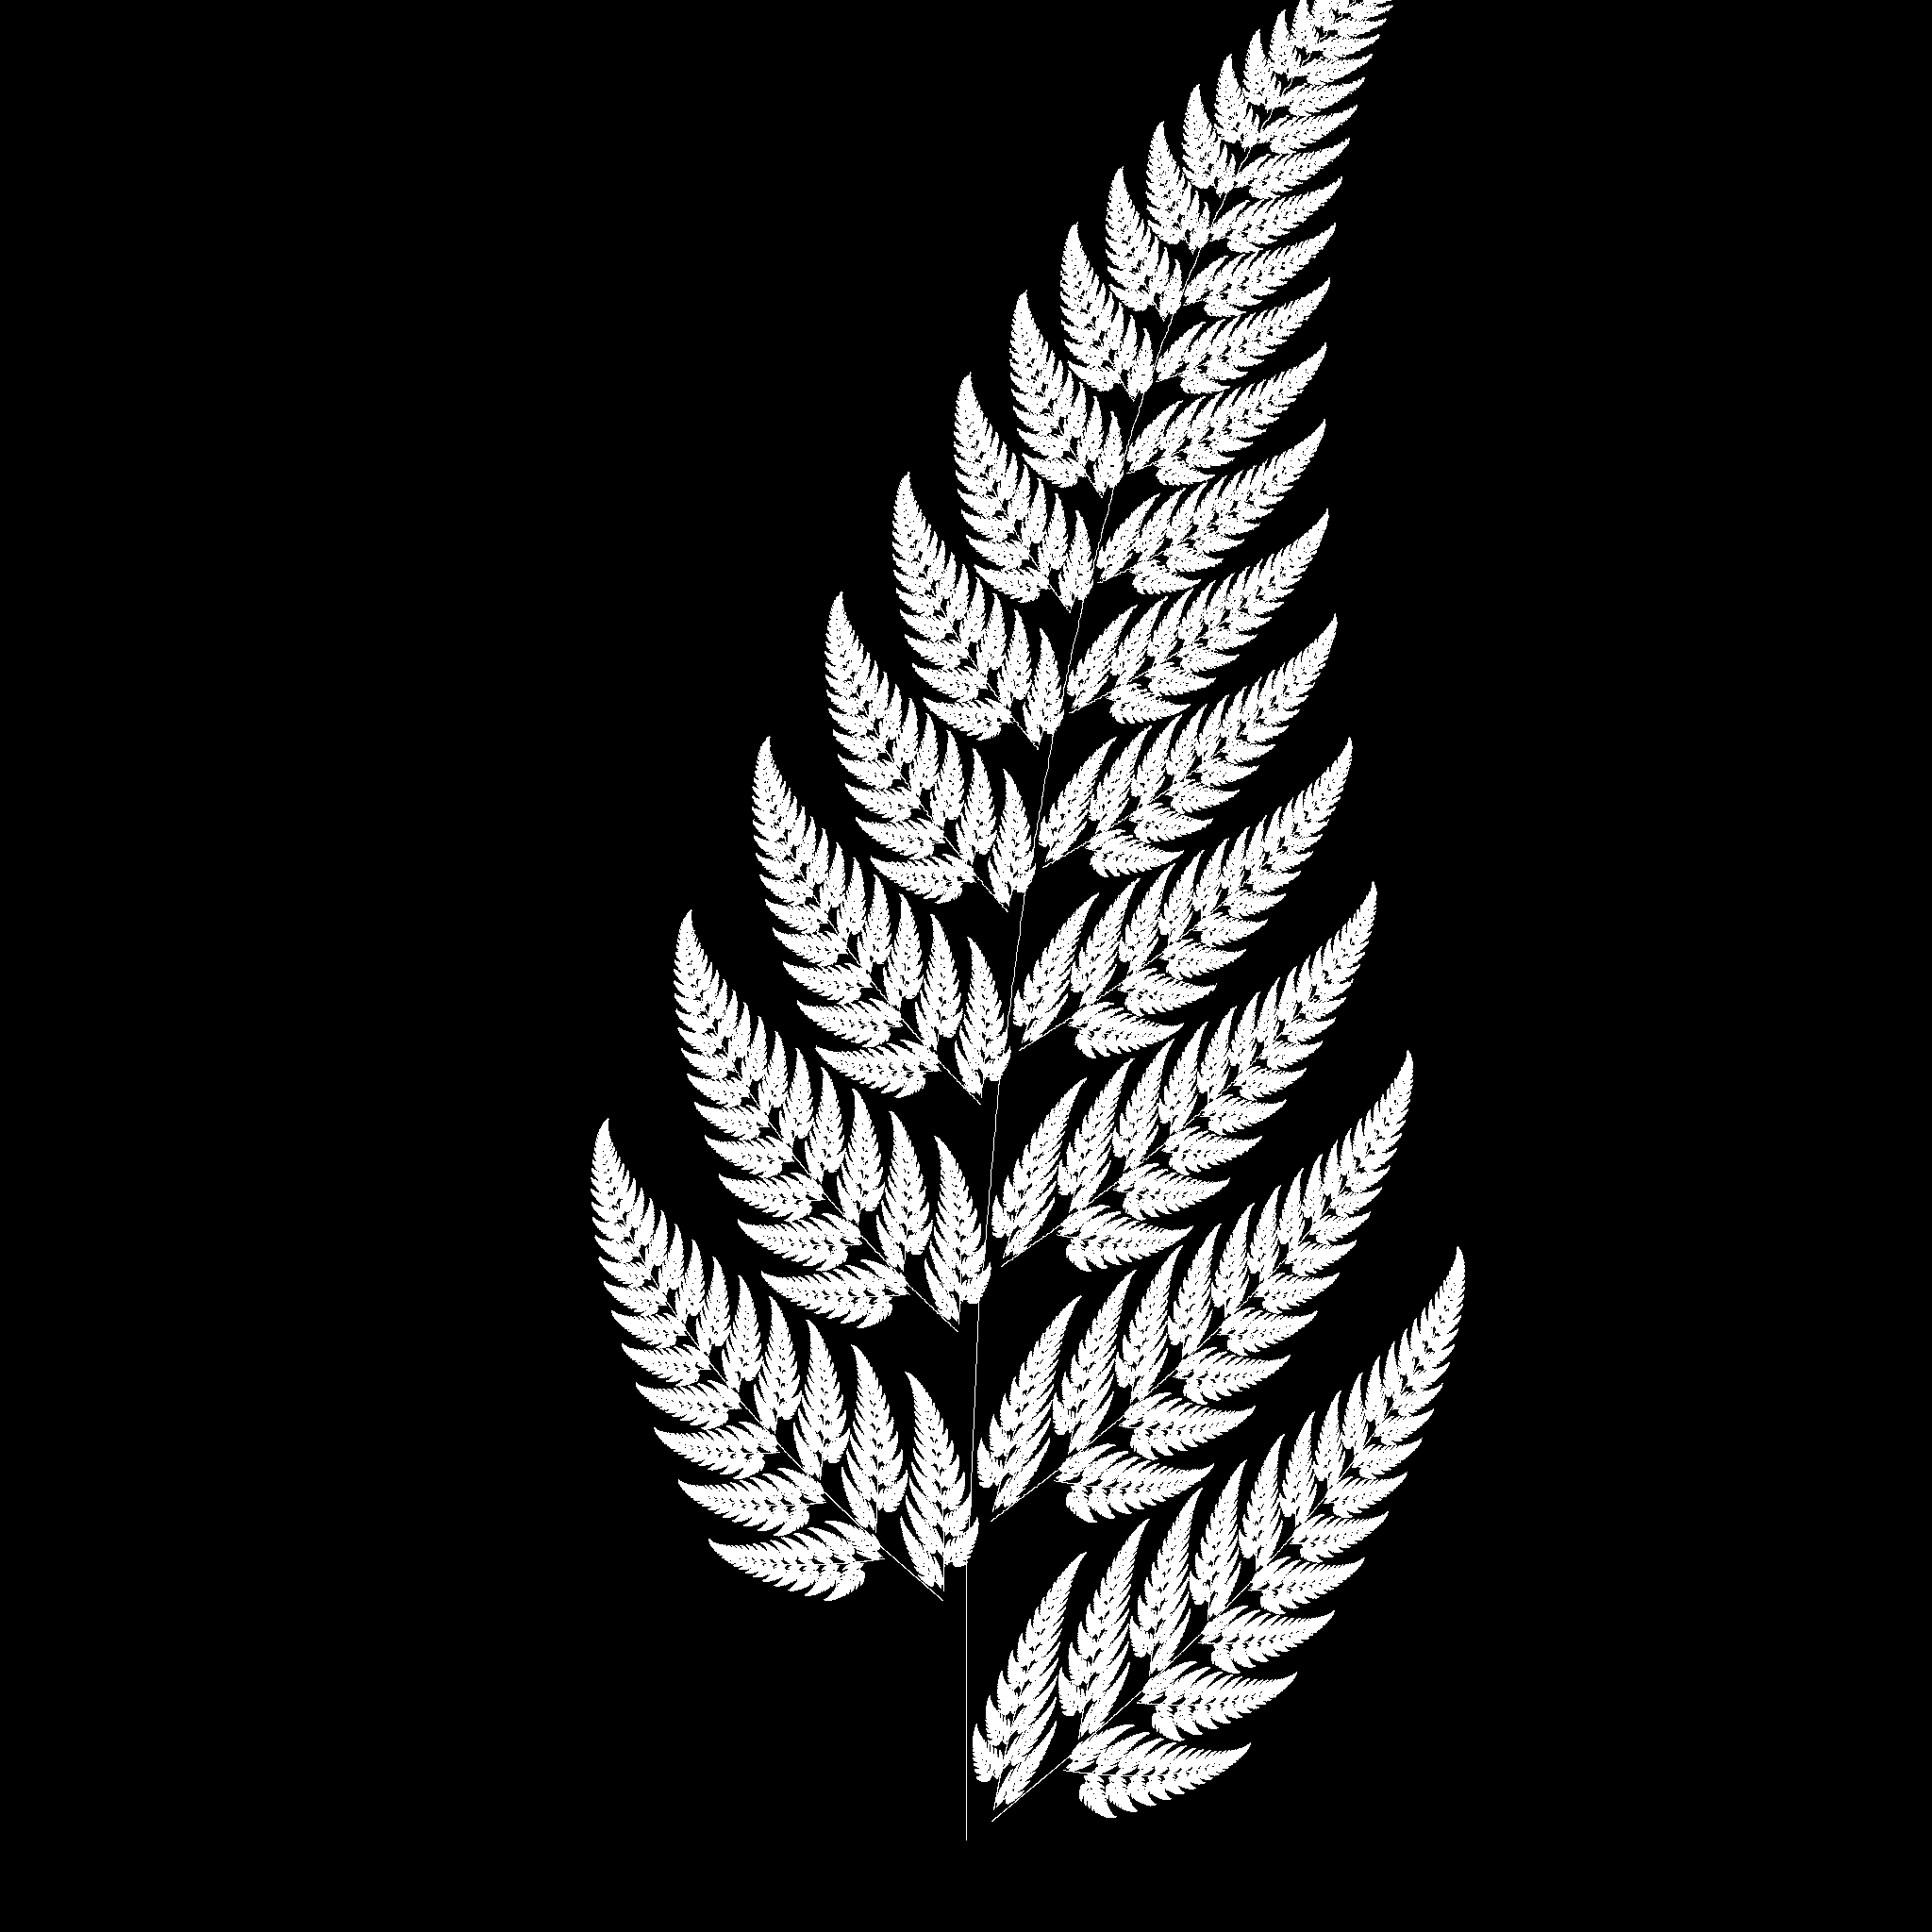

In [54]:
ifs(points, transformations, iterations=100)

Atraktor powstały jest paprotką.

**6. Zaproponuj 3 własne konfiguracje IFS dające ciekawy wizualnie atraktory (para-metry, wizualizacja)**

In [55]:
transformations = [{'a': 0.5, 'b': 0.0, 'c': 0.0, 'd': 0.5, 'e': 0.0, 'f': 0.0},
                   {'a': 0.5, 'b': 0.0, 'c': 0.0, 'd': 0.5, 'e': 0.5, 'f': 0.0},
                   {'a': 0.5, 'b': 0.0, 'c': 0.0, 'd': 0.5, 'e': 0.0, 'f': 0.5}]

  0%|          | 0/100 [00:00<?, ?it/s]

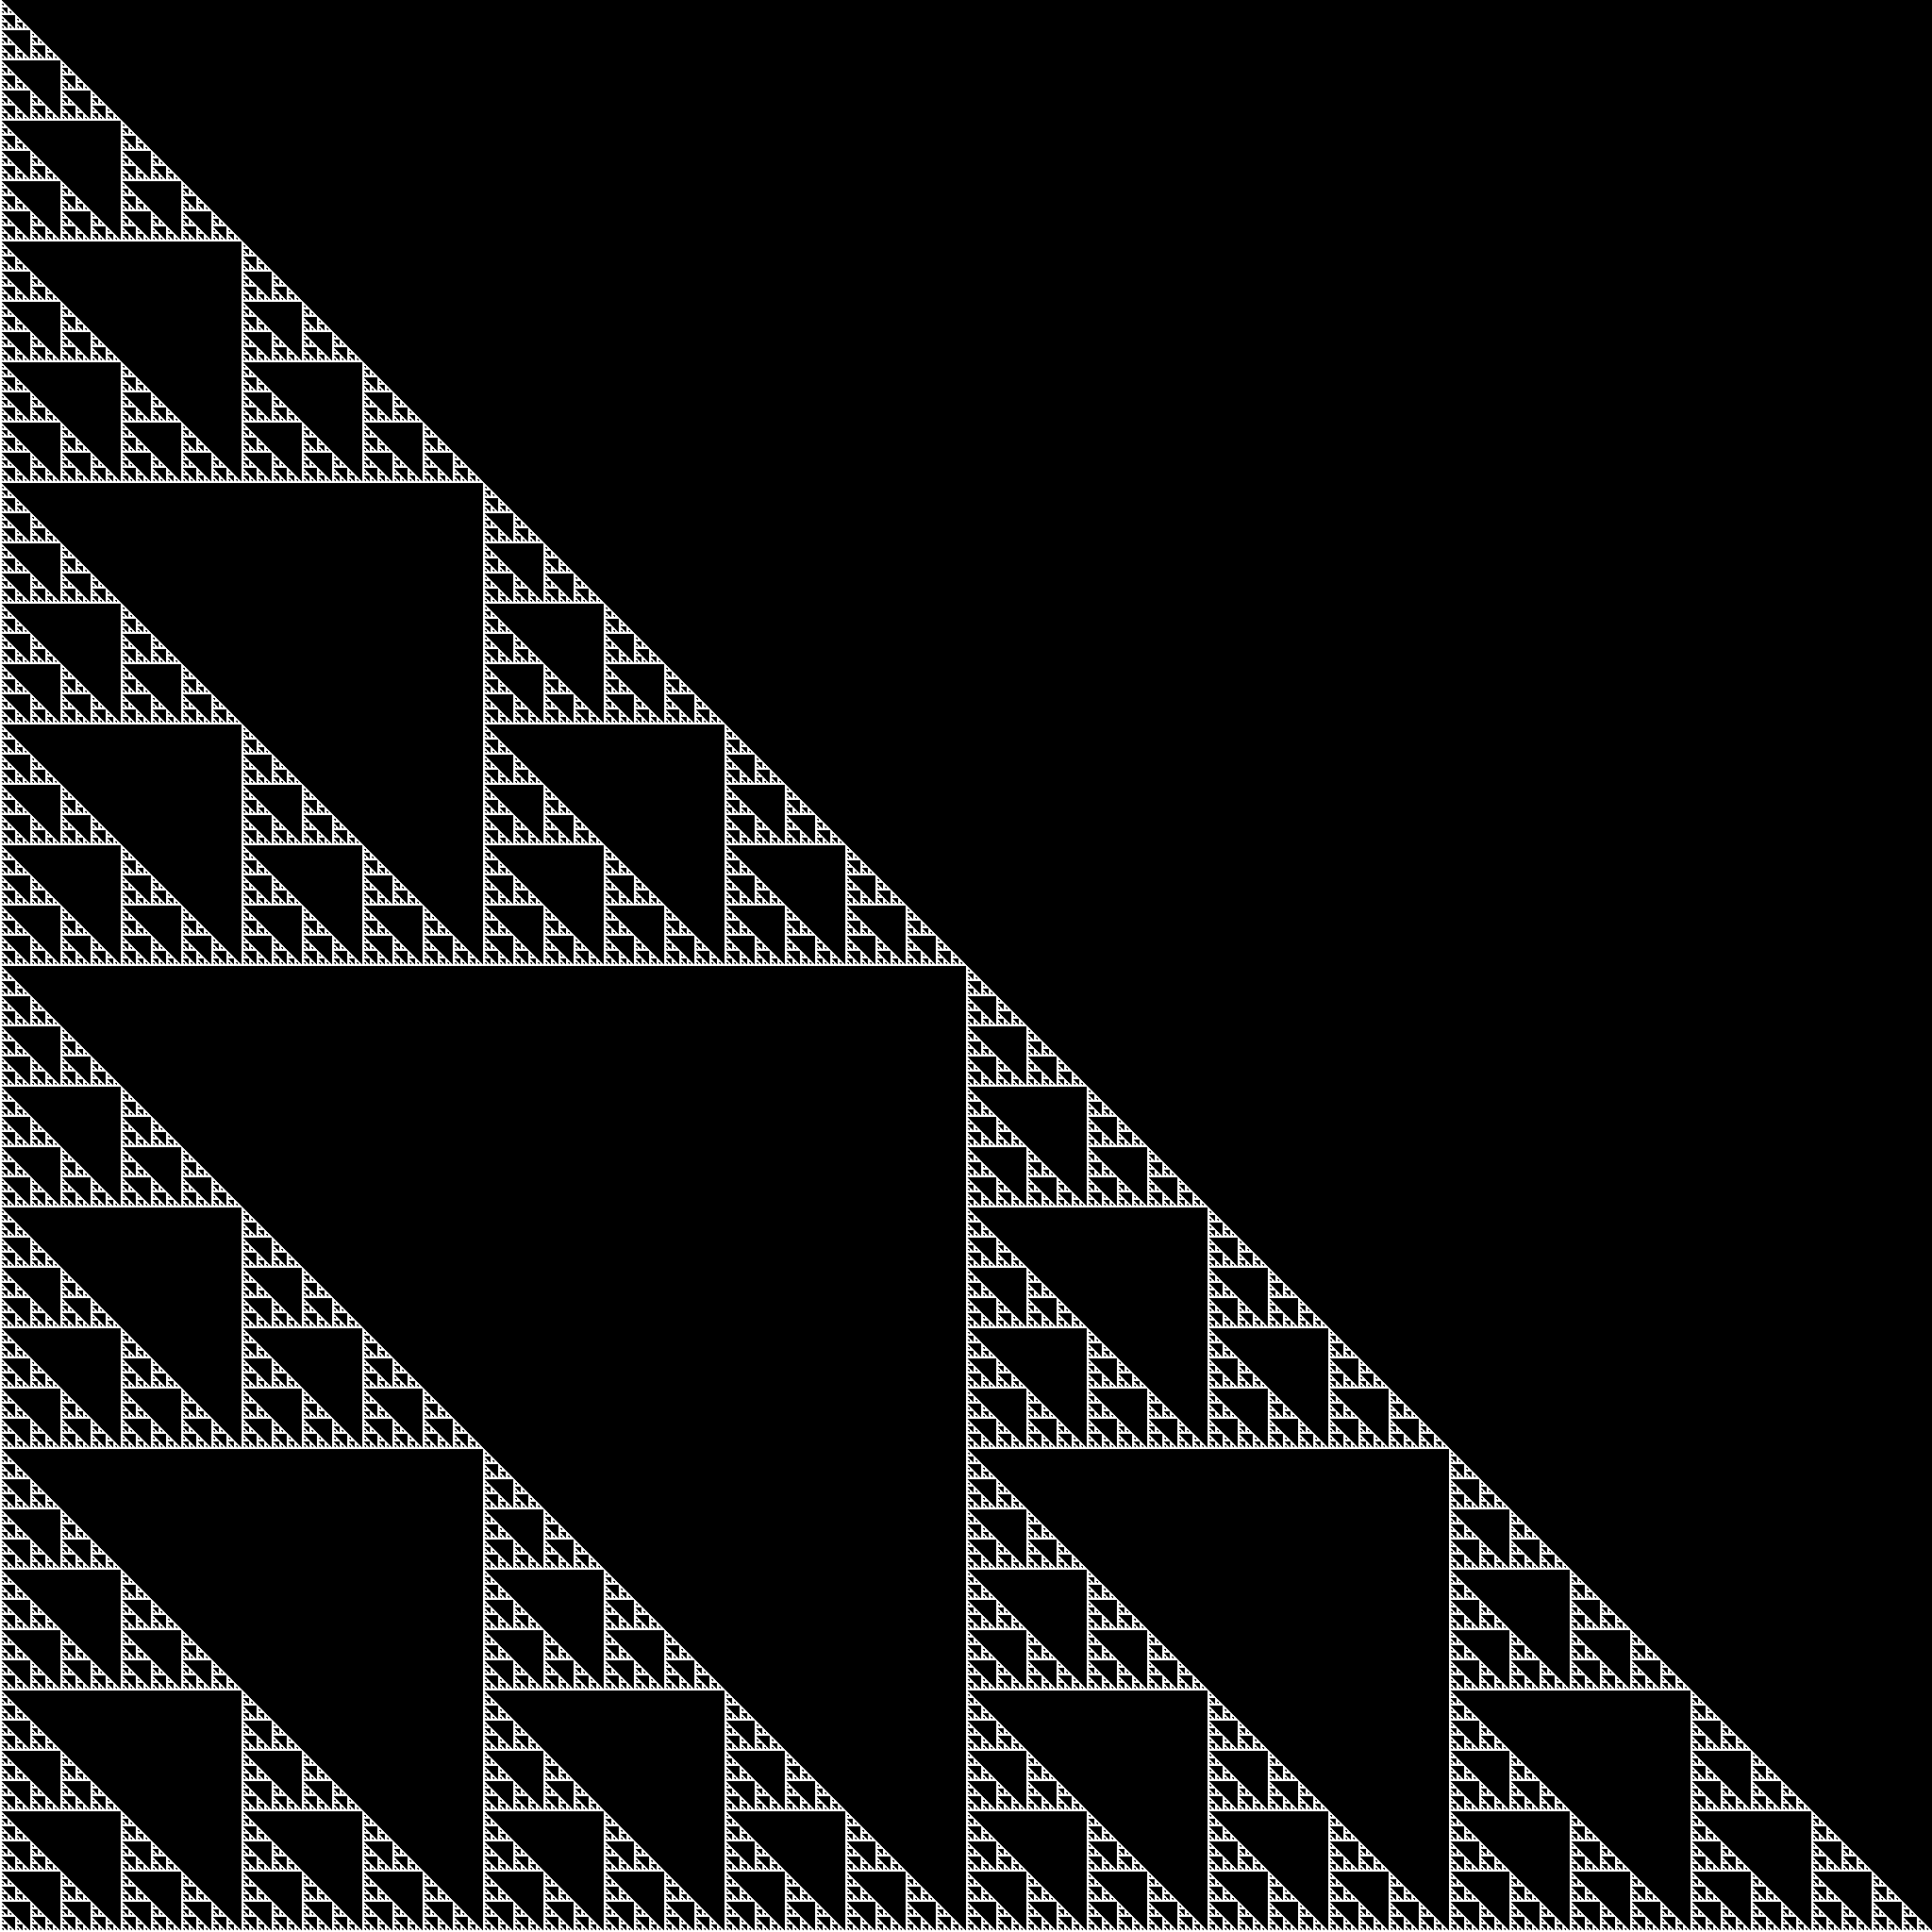

In [56]:
ifs(points, transformations, iterations=100)

Atraktorem jest odmiana trójkąta Sierpińskiego

In [57]:
transformations = [{'a': 0.255, 'b': 0.0, 'c': 0.0, 'd': 0.255, 'e': 0.3726, 'f': 0.6714},
                   {'a': 0.255, 'b': 0.0, 'c': 0.0, 'd': 0.255, 'e': 0.1146, 'f': 0.2232},
                   {'a': 0.255, 'b': 0.0, 'c': 0.0, 'd': 0.255, 'e': 0.6306, 'f': 0.2232},
                   {'a': 0.370, 'b': -0.642, 'c': 0.642, 'd': 0.370, 'e': 0.6356, 'f': -0.0061}]

  0%|          | 0/100 [00:00<?, ?it/s]

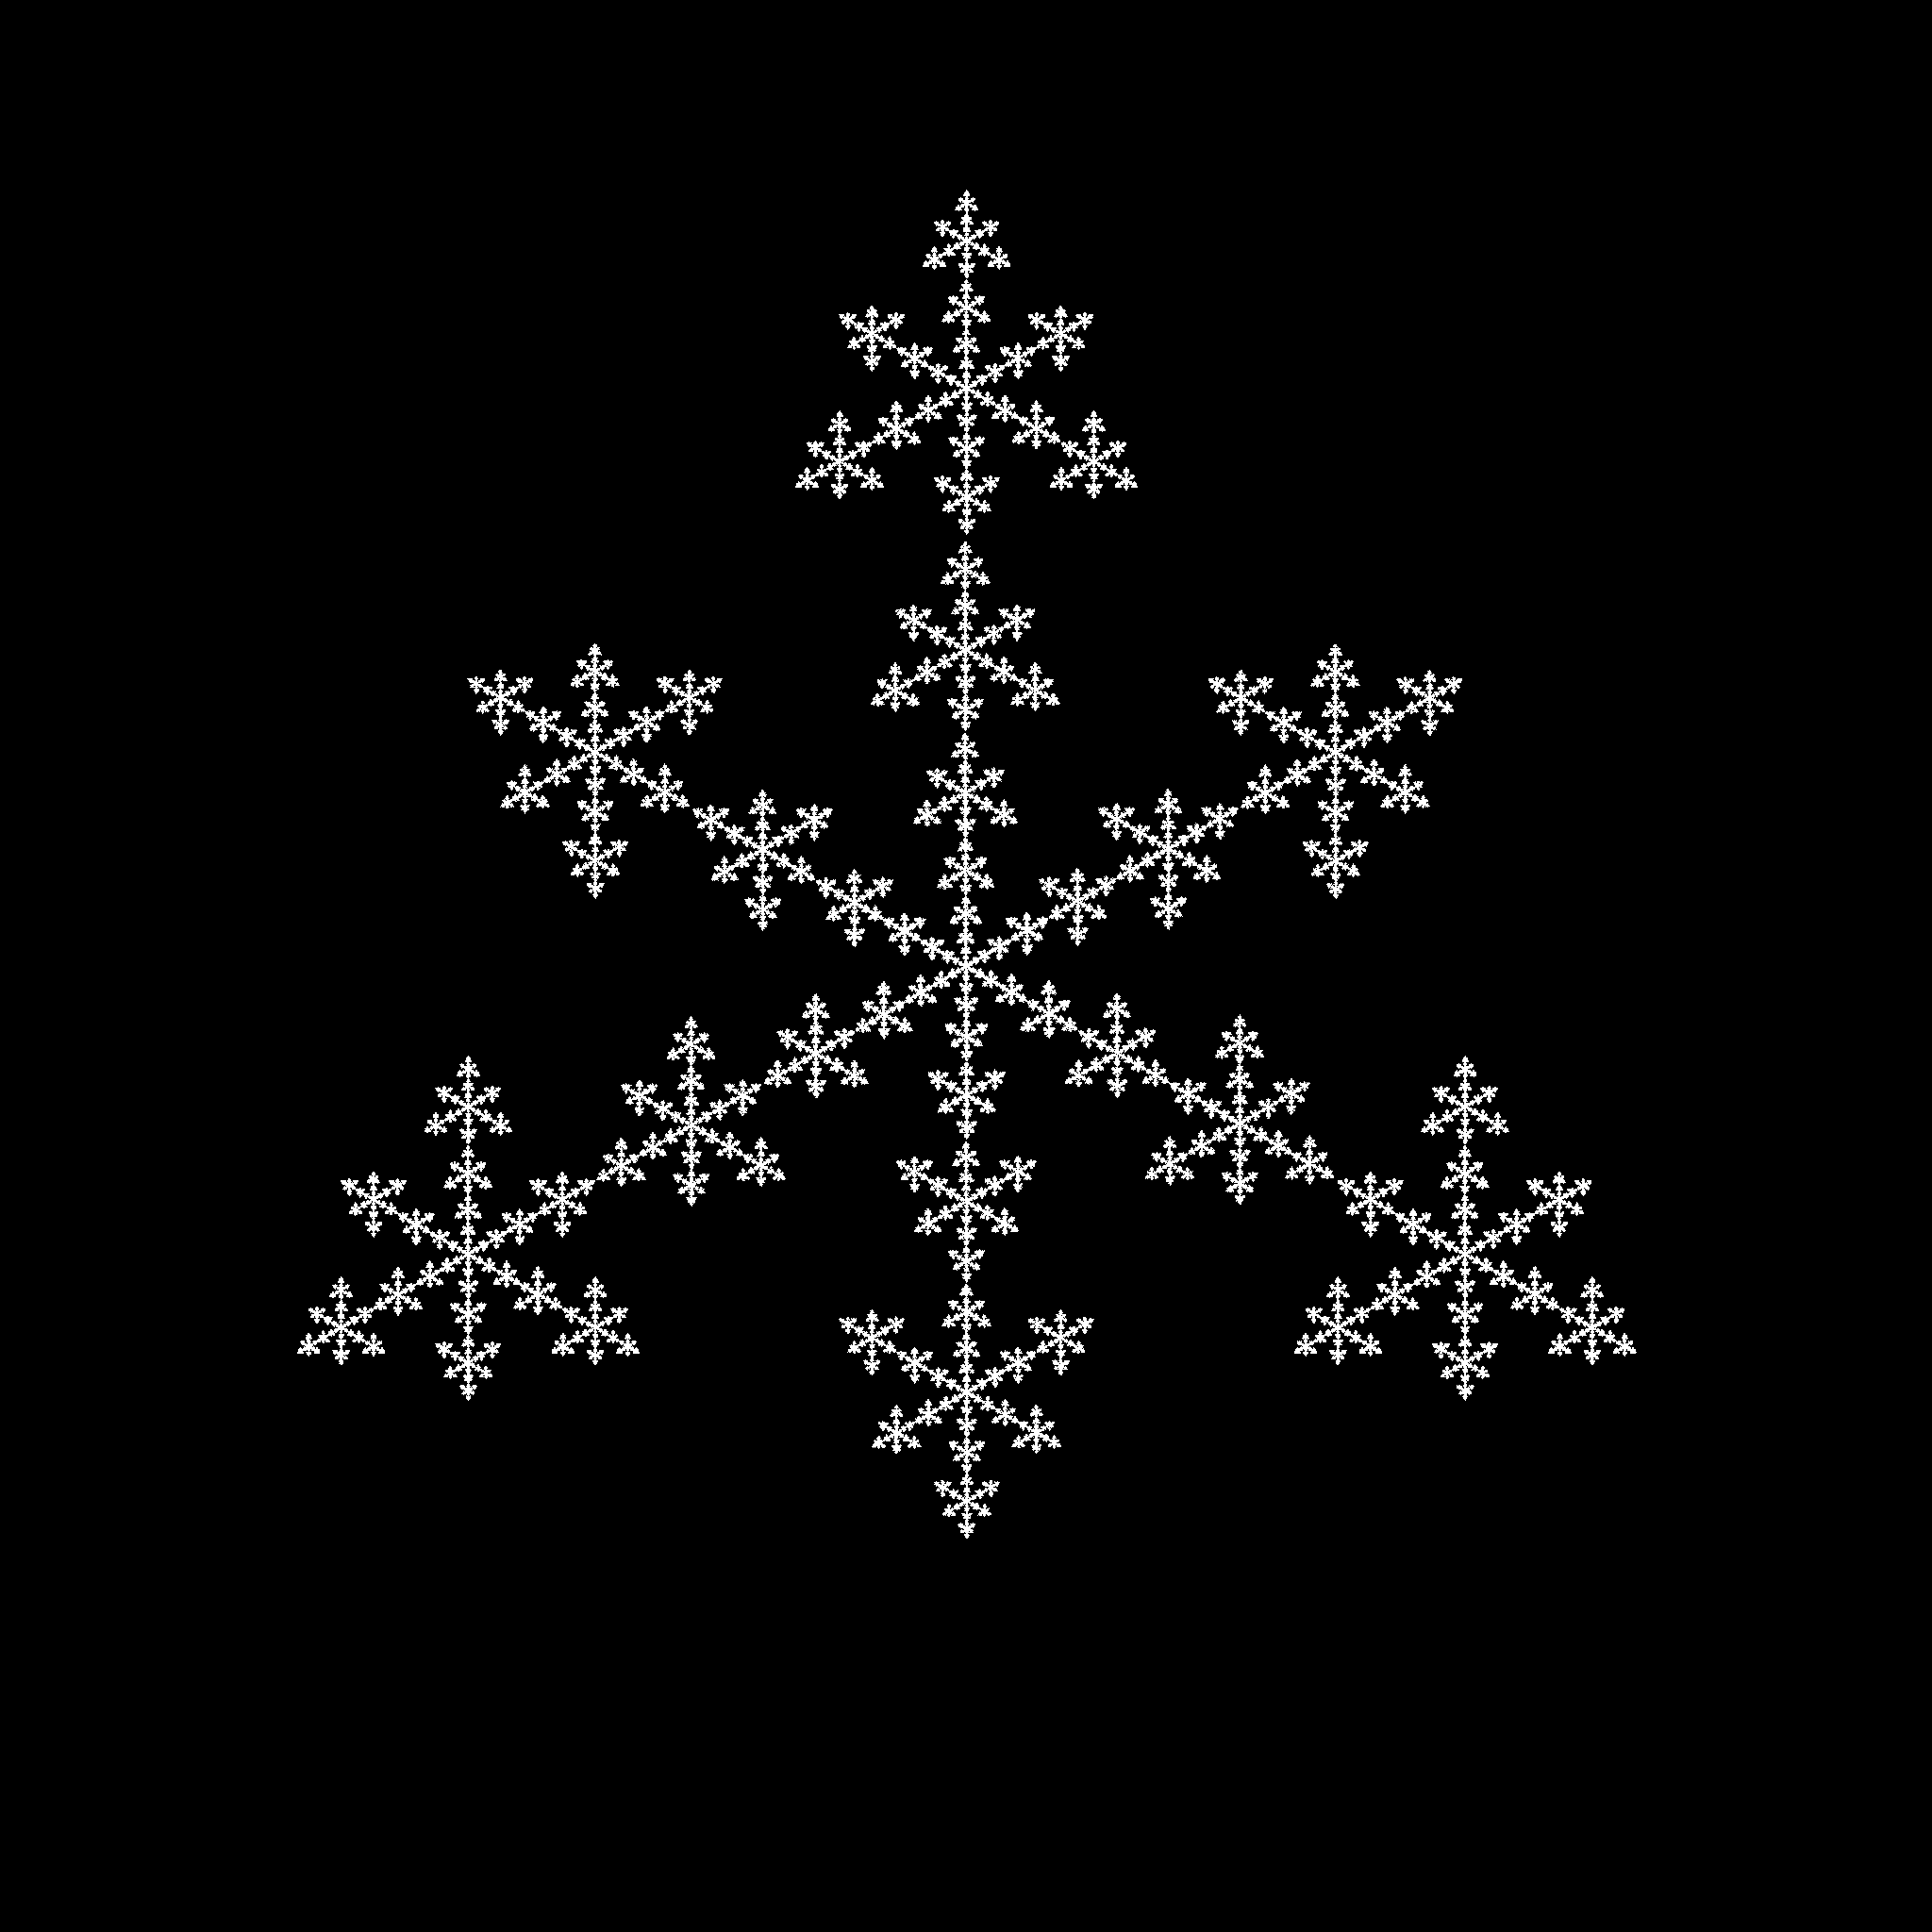

In [58]:
ifs(points, transformations, iterations=100)

Atraktorem jest Krzystałek o czterech przekształceniach

In [59]:
transformations = [{'a': 0.195, 'b': -0.488, 'c': 0.344, 'd': 0.433, 'e': 0.4431, 'f': 0.2452},
                   {'a': 0.462, 'b': 0.414, 'c': -0.252, 'd': 0.361, 'e': 0.2511, 'f': 0.5692},
                   {'a': -0.058, 'b': -0.070, 'c': 0.453, 'd': -0.111, 'e': 0.5976, 'f': 0.0969},
                   {'a': -0.035, 'b': 0.07, 'c': -0.469, 'd': -0.022, 'e': 0.4884, 'f': 0.5069},
                   {'a': -0.637, 'b': 0.0, 'c': 0.0, 'd': 0.501, 'e': 0.8562, 'f': 0.2513}]

  0%|          | 0/100 [00:00<?, ?it/s]

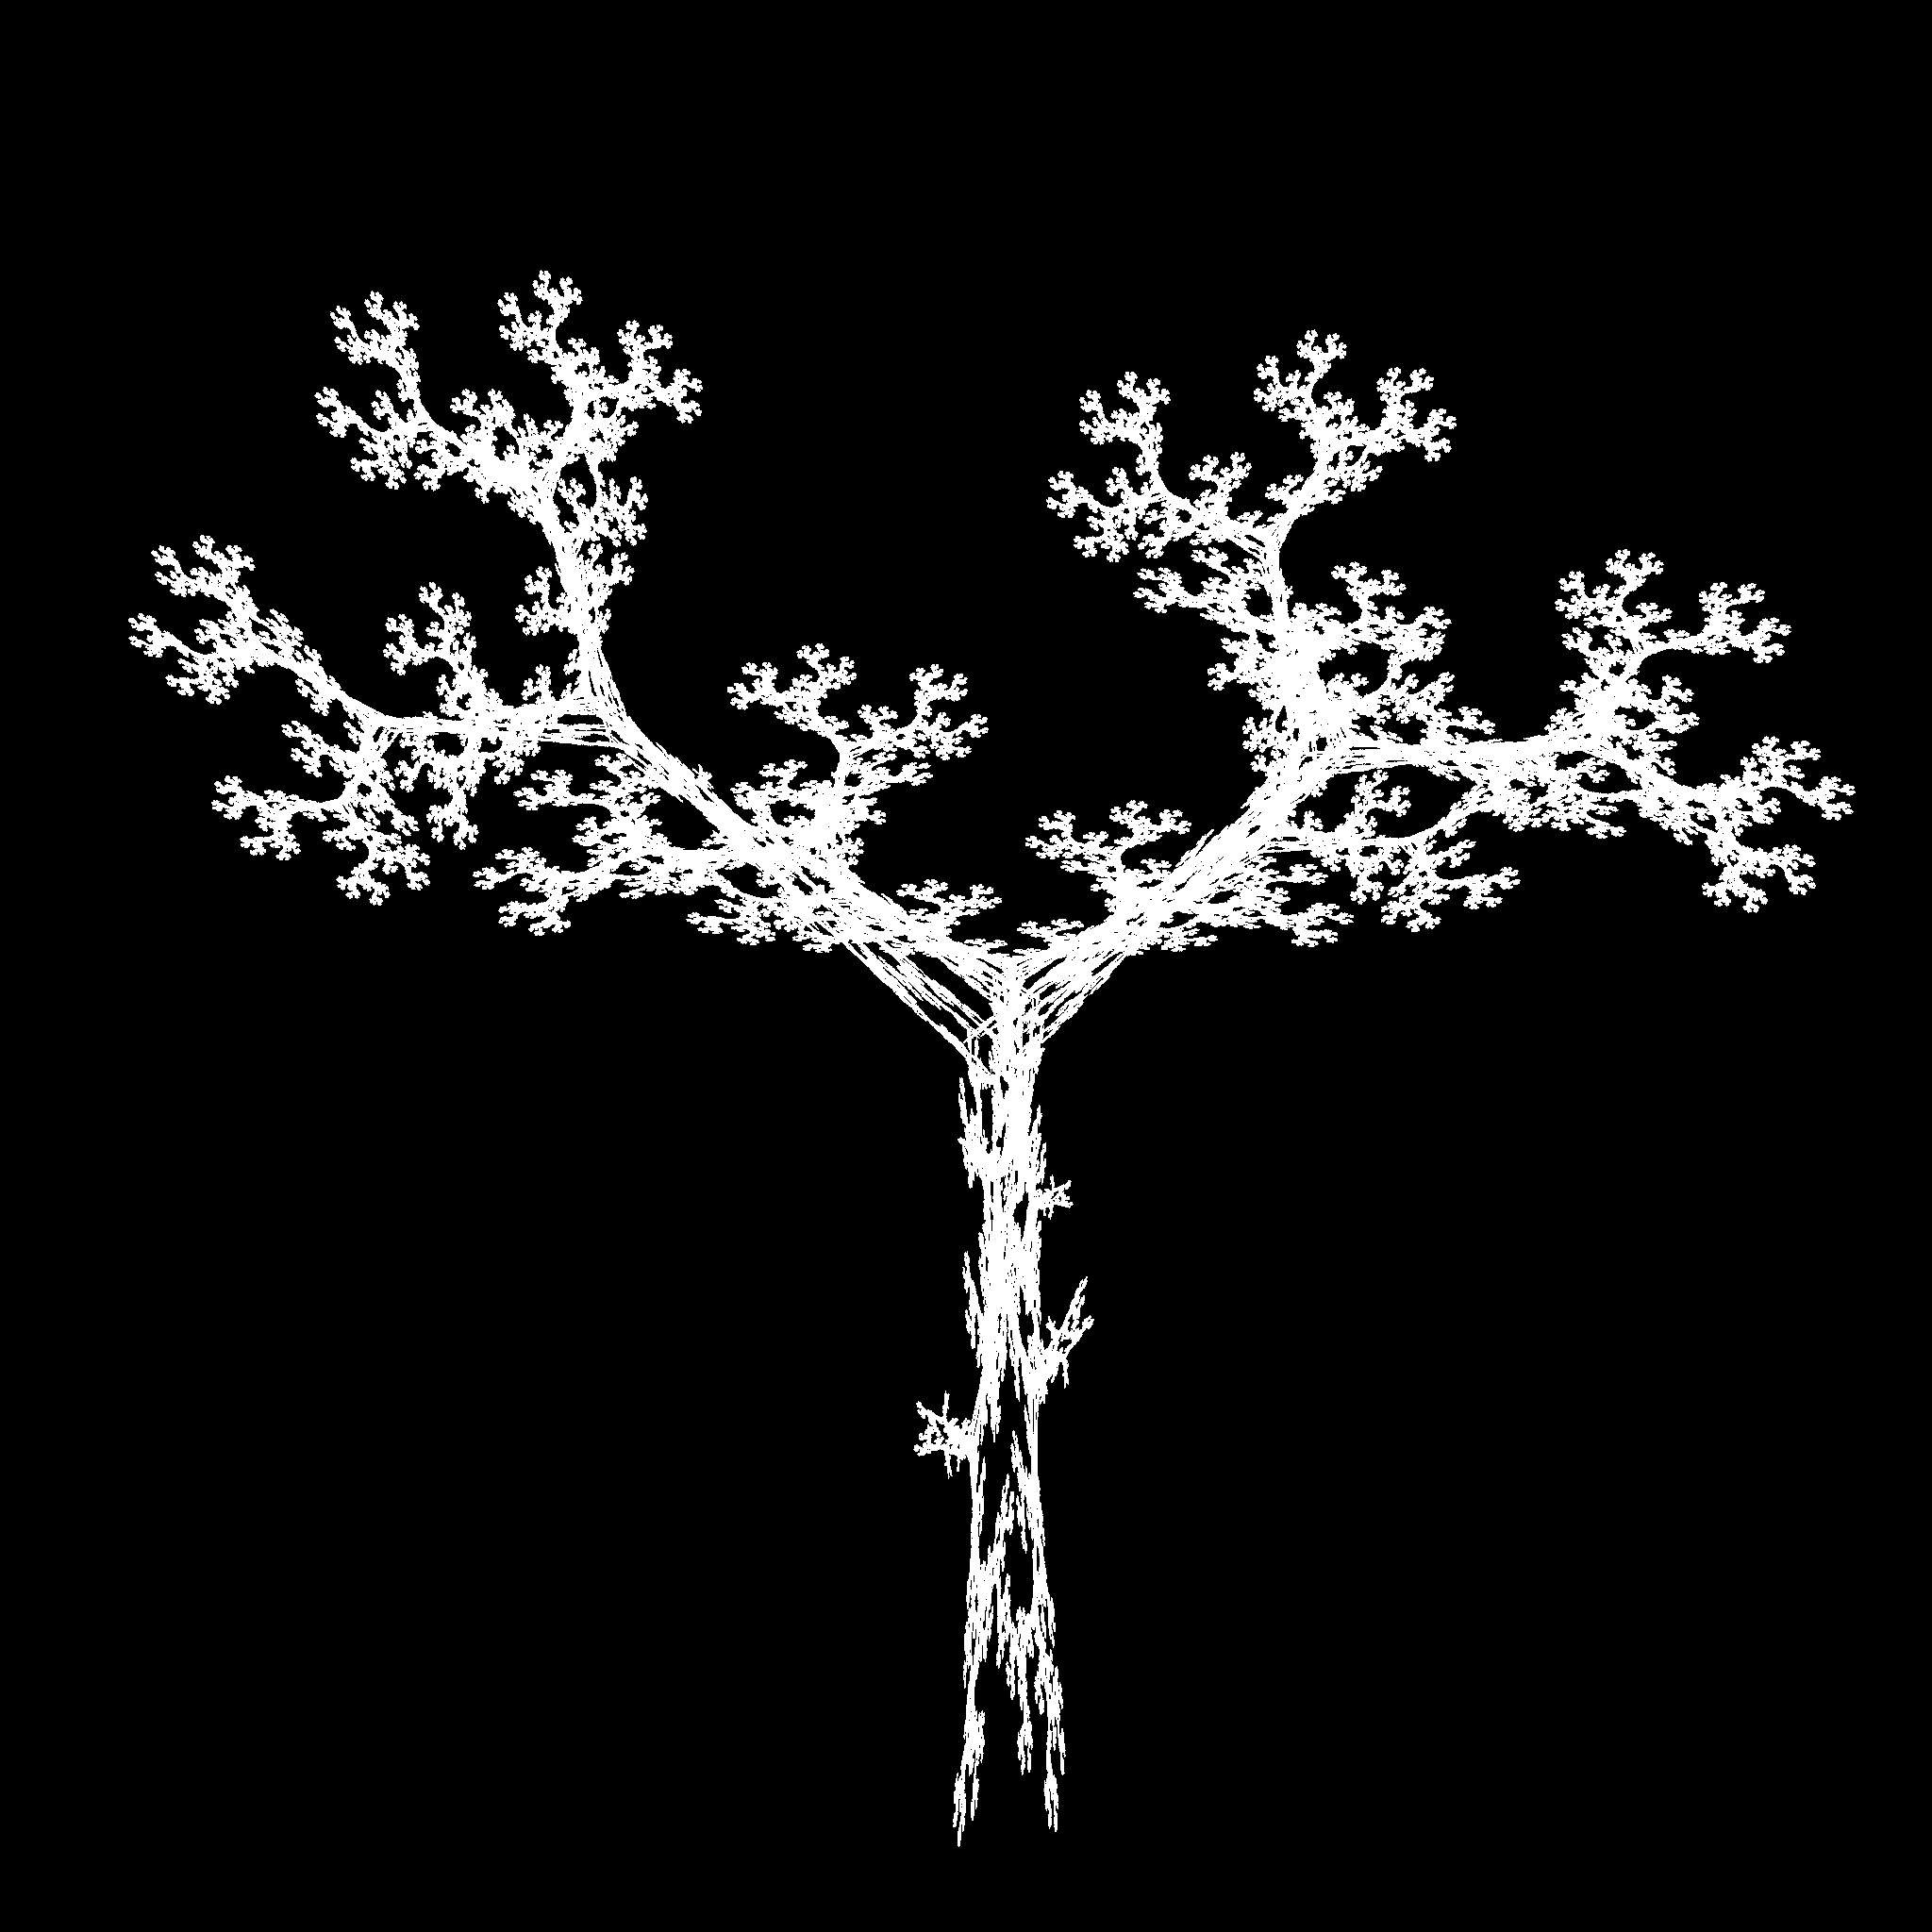

In [60]:
ifs(points, transformations, iterations=100)

Atraktorem jest drzewo

# Zadanie 2* Kopiarka wielokrotnie redukująca z ruletką

**1. Do konfiguracji IFS z poprzedniego zadania (wybierz 5 najciekawszych) oraz rozkładu równomiernego prawdopodobieństw pi przestaw rezultaty iteracji dla wielu punktów wiodących (np. 100000).**

In [61]:
import random

In [104]:
 def ifsp(points, transformations, probability_weights, width=2048, height=2048, iterations=100000):
  # for each iteration
    points = [(0, 0)]

    point = points[0]
    for i in tqdm(range(iterations)):
        if probability_weights is not None:
            transformation = random.choices(transformations, weights=probability_weights)[0]
        else:
            transformation = random.choice(transformations)
        new_x = int(round(transformation['a'] * point[0] + transformation['b'] * point[1] + transformation['e'] * width))
        new_y = int(round(transformation['c'] * point[0] + transformation['d'] * point[1] + transformation['f'] * height))
        new_point = (new_x, new_y)
        points.append(new_point)
        point = new_point

    plot(points)

Dla miliona punktów wiodących

In [86]:
transformations = [{'a': 0.0, 'b': -0.5, 'c': 0.5, 'd': 0.0, 'e': 0.5, 'f': 0.0},
                   {'a': 0.0, 'b': 0.5, 'c': -0.5, 'd': 0.0, 'e': 0.5, 'f': 0.5},
                   {'a': 0.5, 'b': 0.0, 'c': 0.0, 'd': 0.5, 'e': 0.25, 'f': 0.5}]

  0%|          | 0/1000000 [00:00<?, ?it/s]

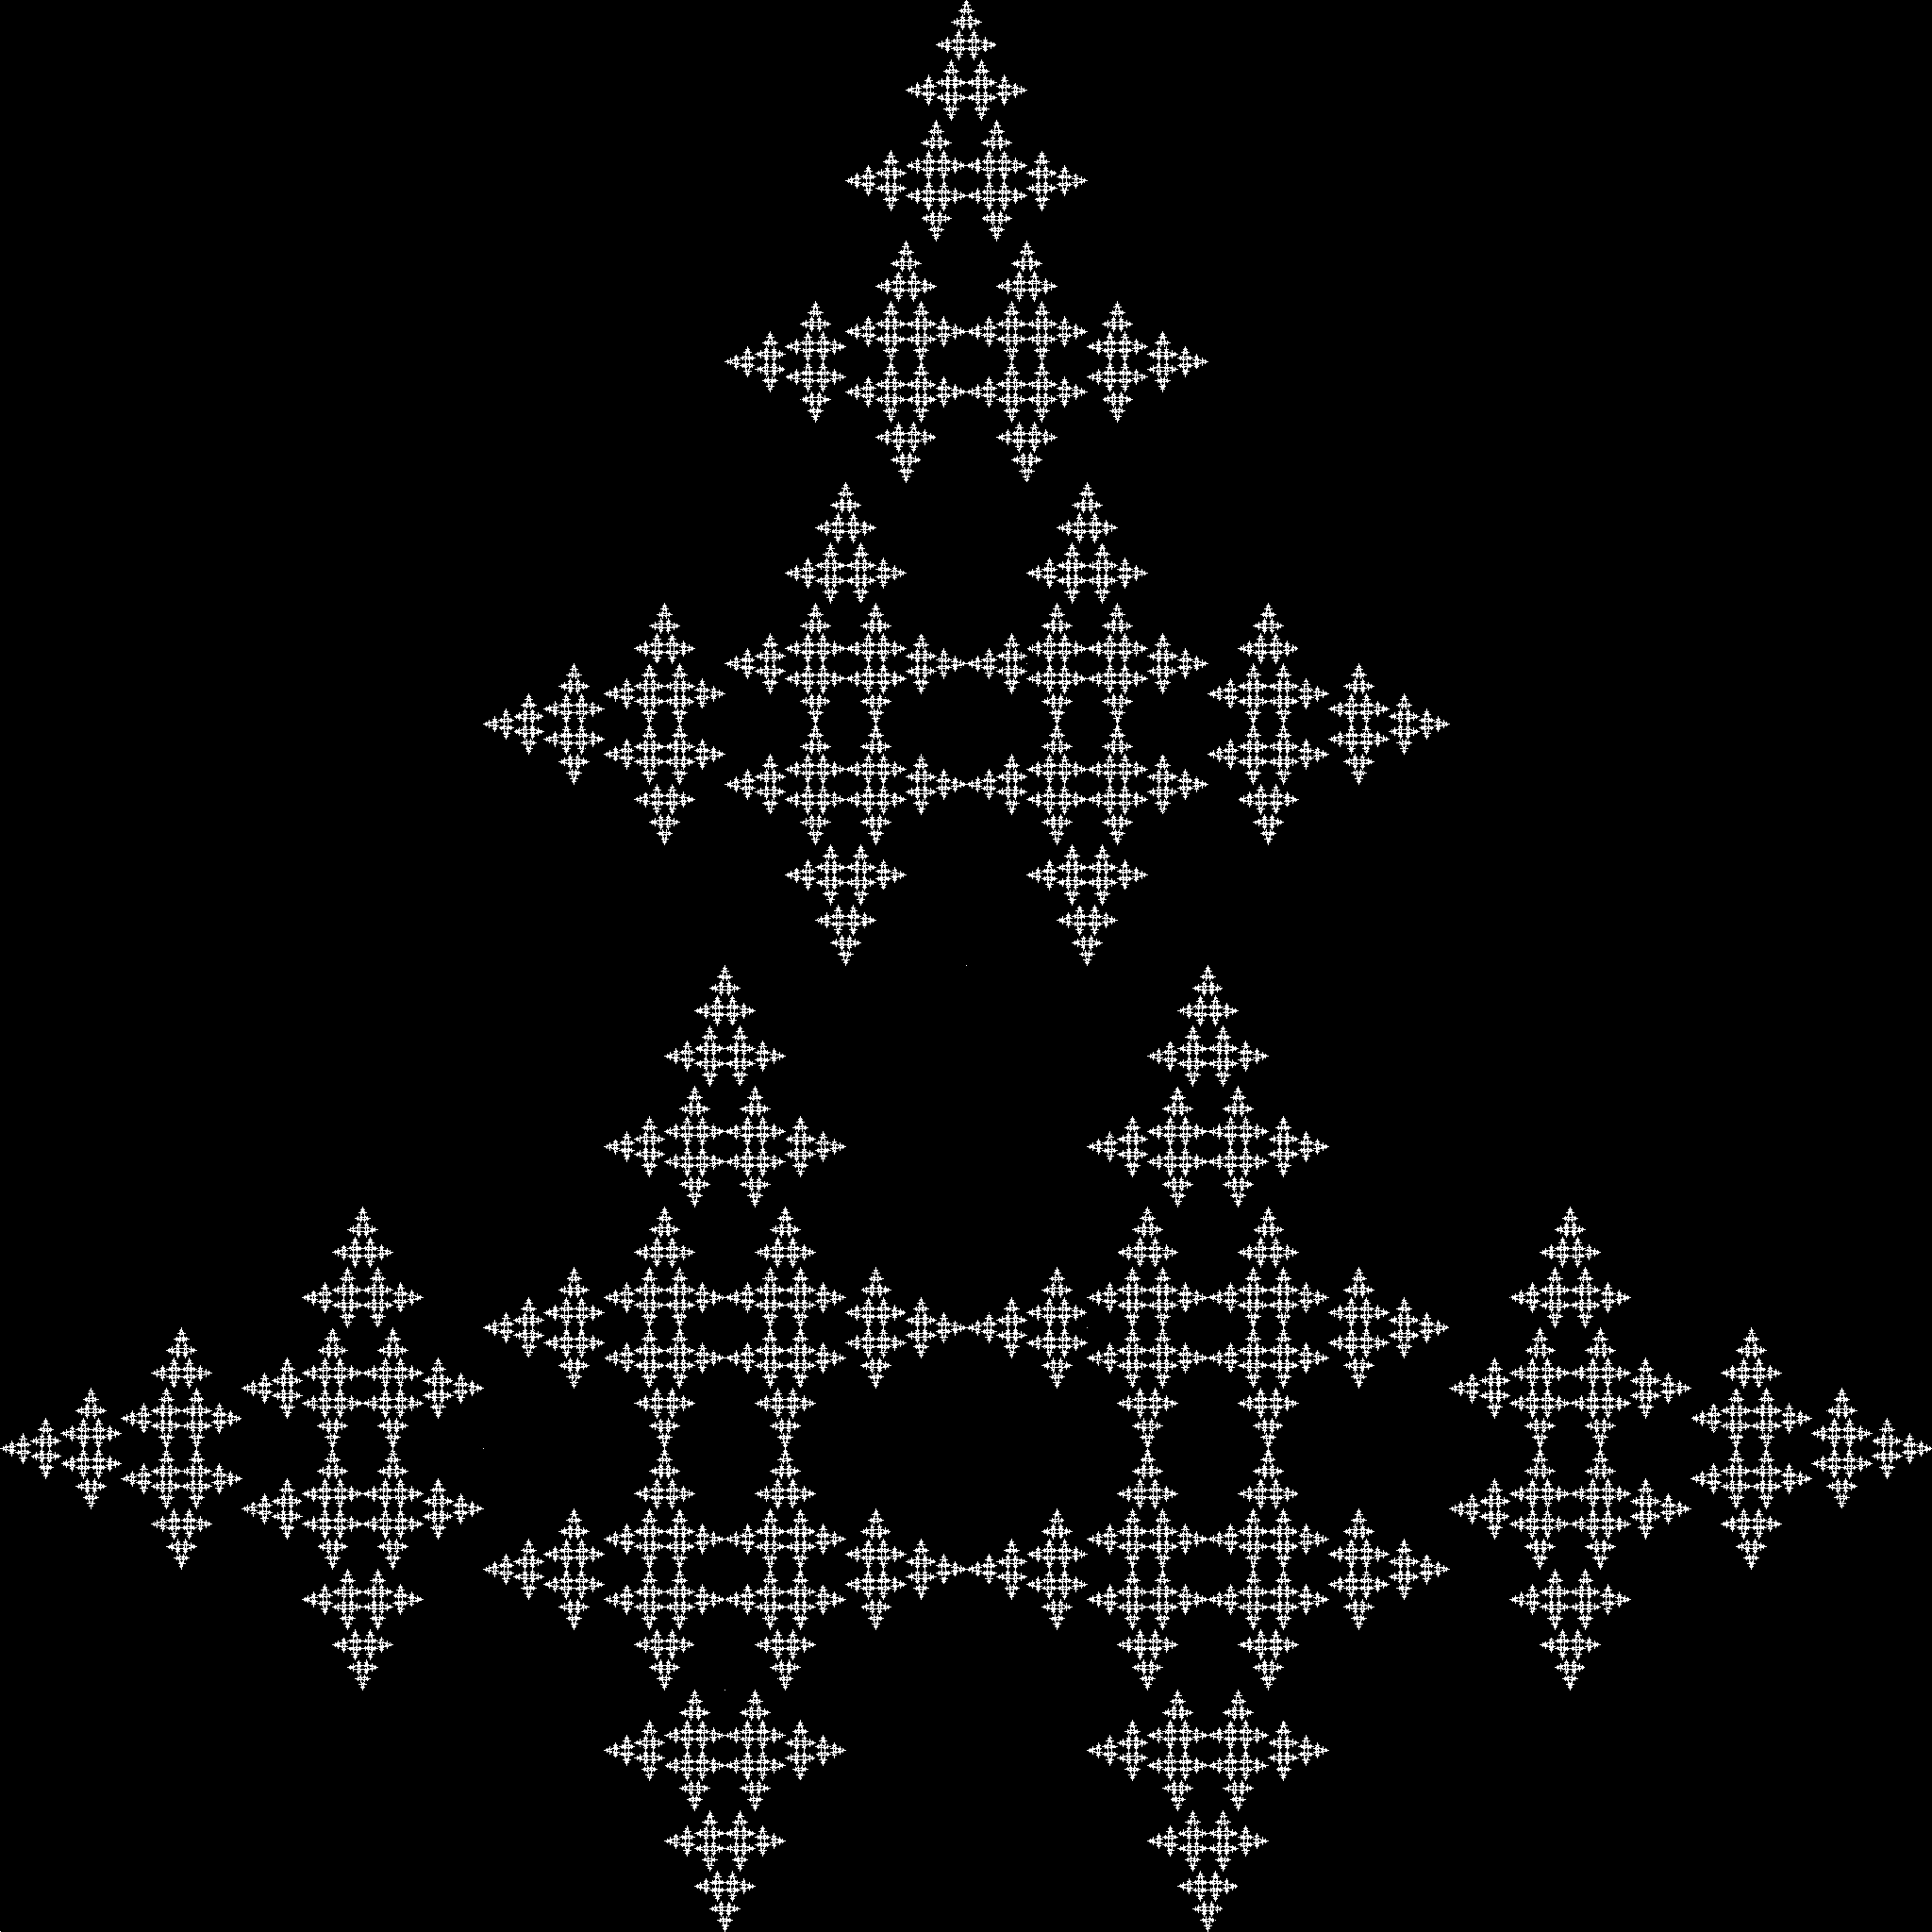

In [87]:
ifsp(points, transformations, None, iterations=1000000)

In [76]:
transformations = [{'a': 0.849, 'b': 0.037, 'c': -0.037, 'd': 0.849, 'e': 0.075, 'f': 0.1830},
                   {'a': 0.197, 'b': -0.226, 'c': 0.226, 'd': 0.197, 'e': 0.400, 'f': 0.049},
                   {'a': -0.150, 'b': 0.283, 'c': 0.260, 'd': 0.237, 'e': 0.575, 'f': -0.084},
                   {'a': 0.0, 'b': 0.0, 'c': 0.0, 'd': 0.16, 'e': 0.500, 'f': 0.040}]

  0%|          | 0/1000000 [00:00<?, ?it/s]

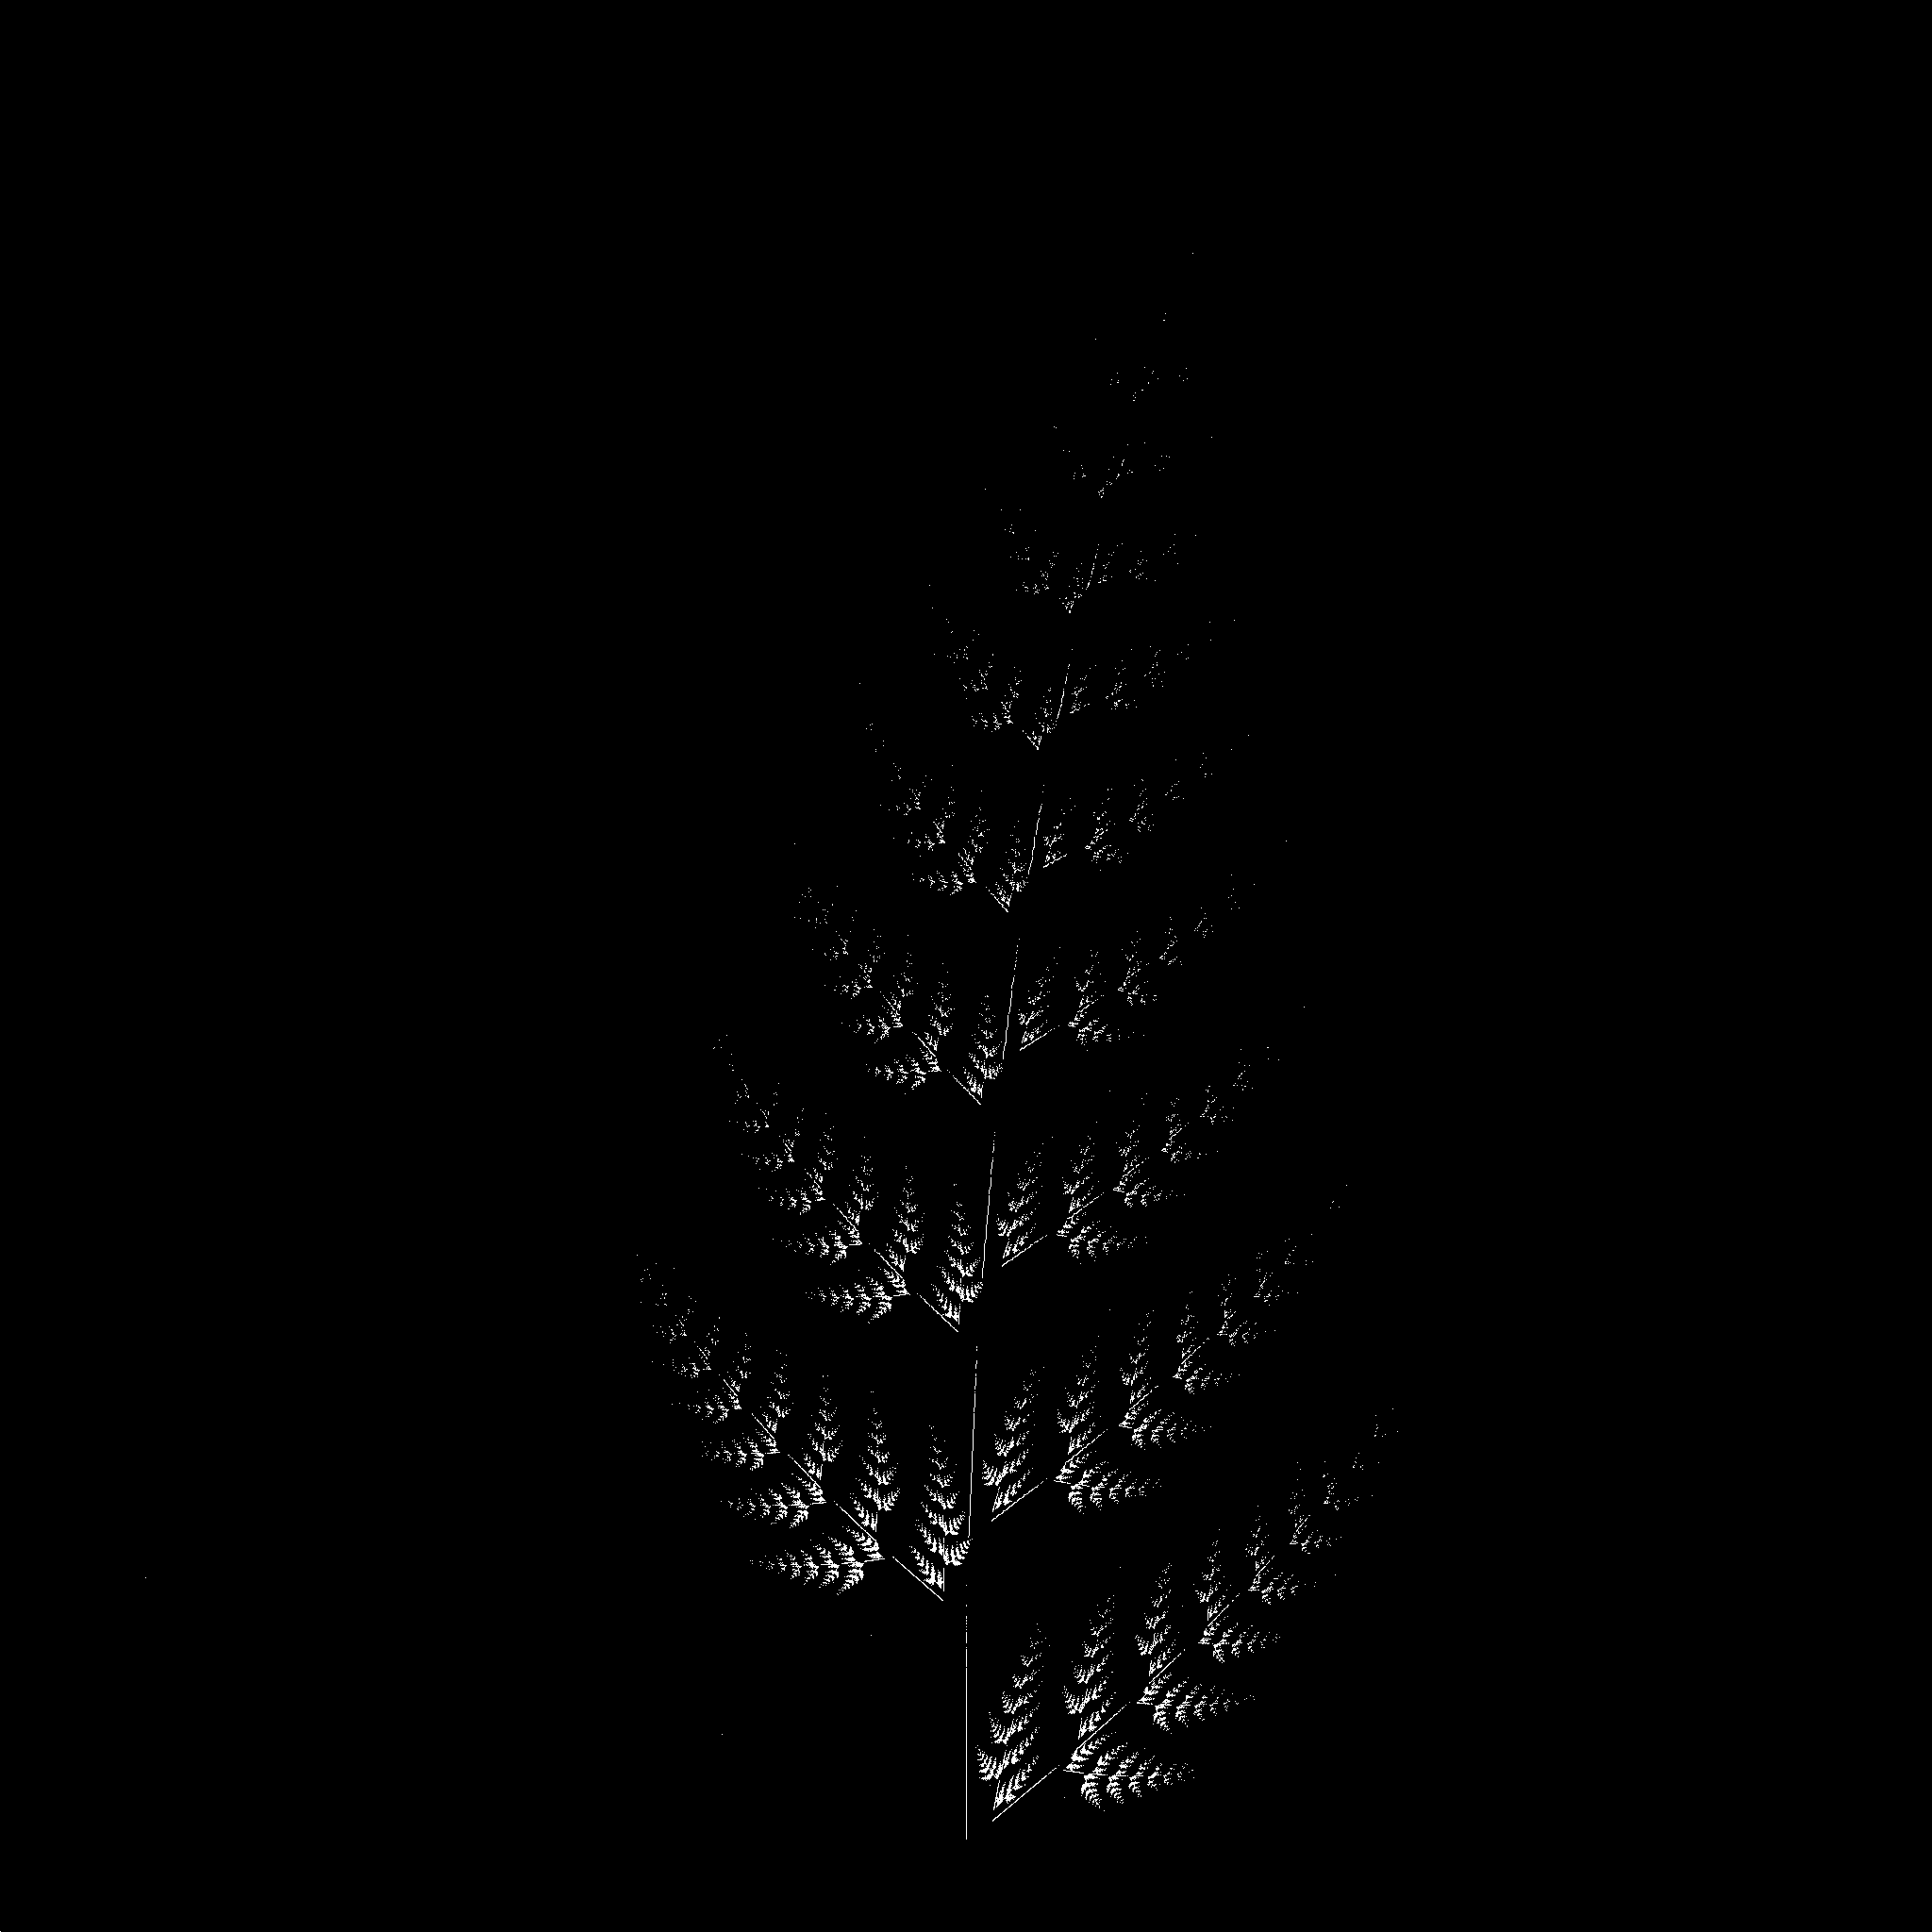

In [77]:
ifsp(points, transformations, None, iterations=1000000)

In [78]:
transformations = [{'a': 0.5, 'b': 0.0, 'c': 0.0, 'd': 0.5, 'e': 0.0, 'f': 0.0},
                   {'a': 0.5, 'b': 0.0, 'c': 0.0, 'd': 0.5, 'e': 0.5, 'f': 0.0},
                   {'a': 0.5, 'b': 0.0, 'c': 0.0, 'd': 0.5, 'e': 0.0, 'f': 0.5}]

  0%|          | 0/1000000 [00:00<?, ?it/s]

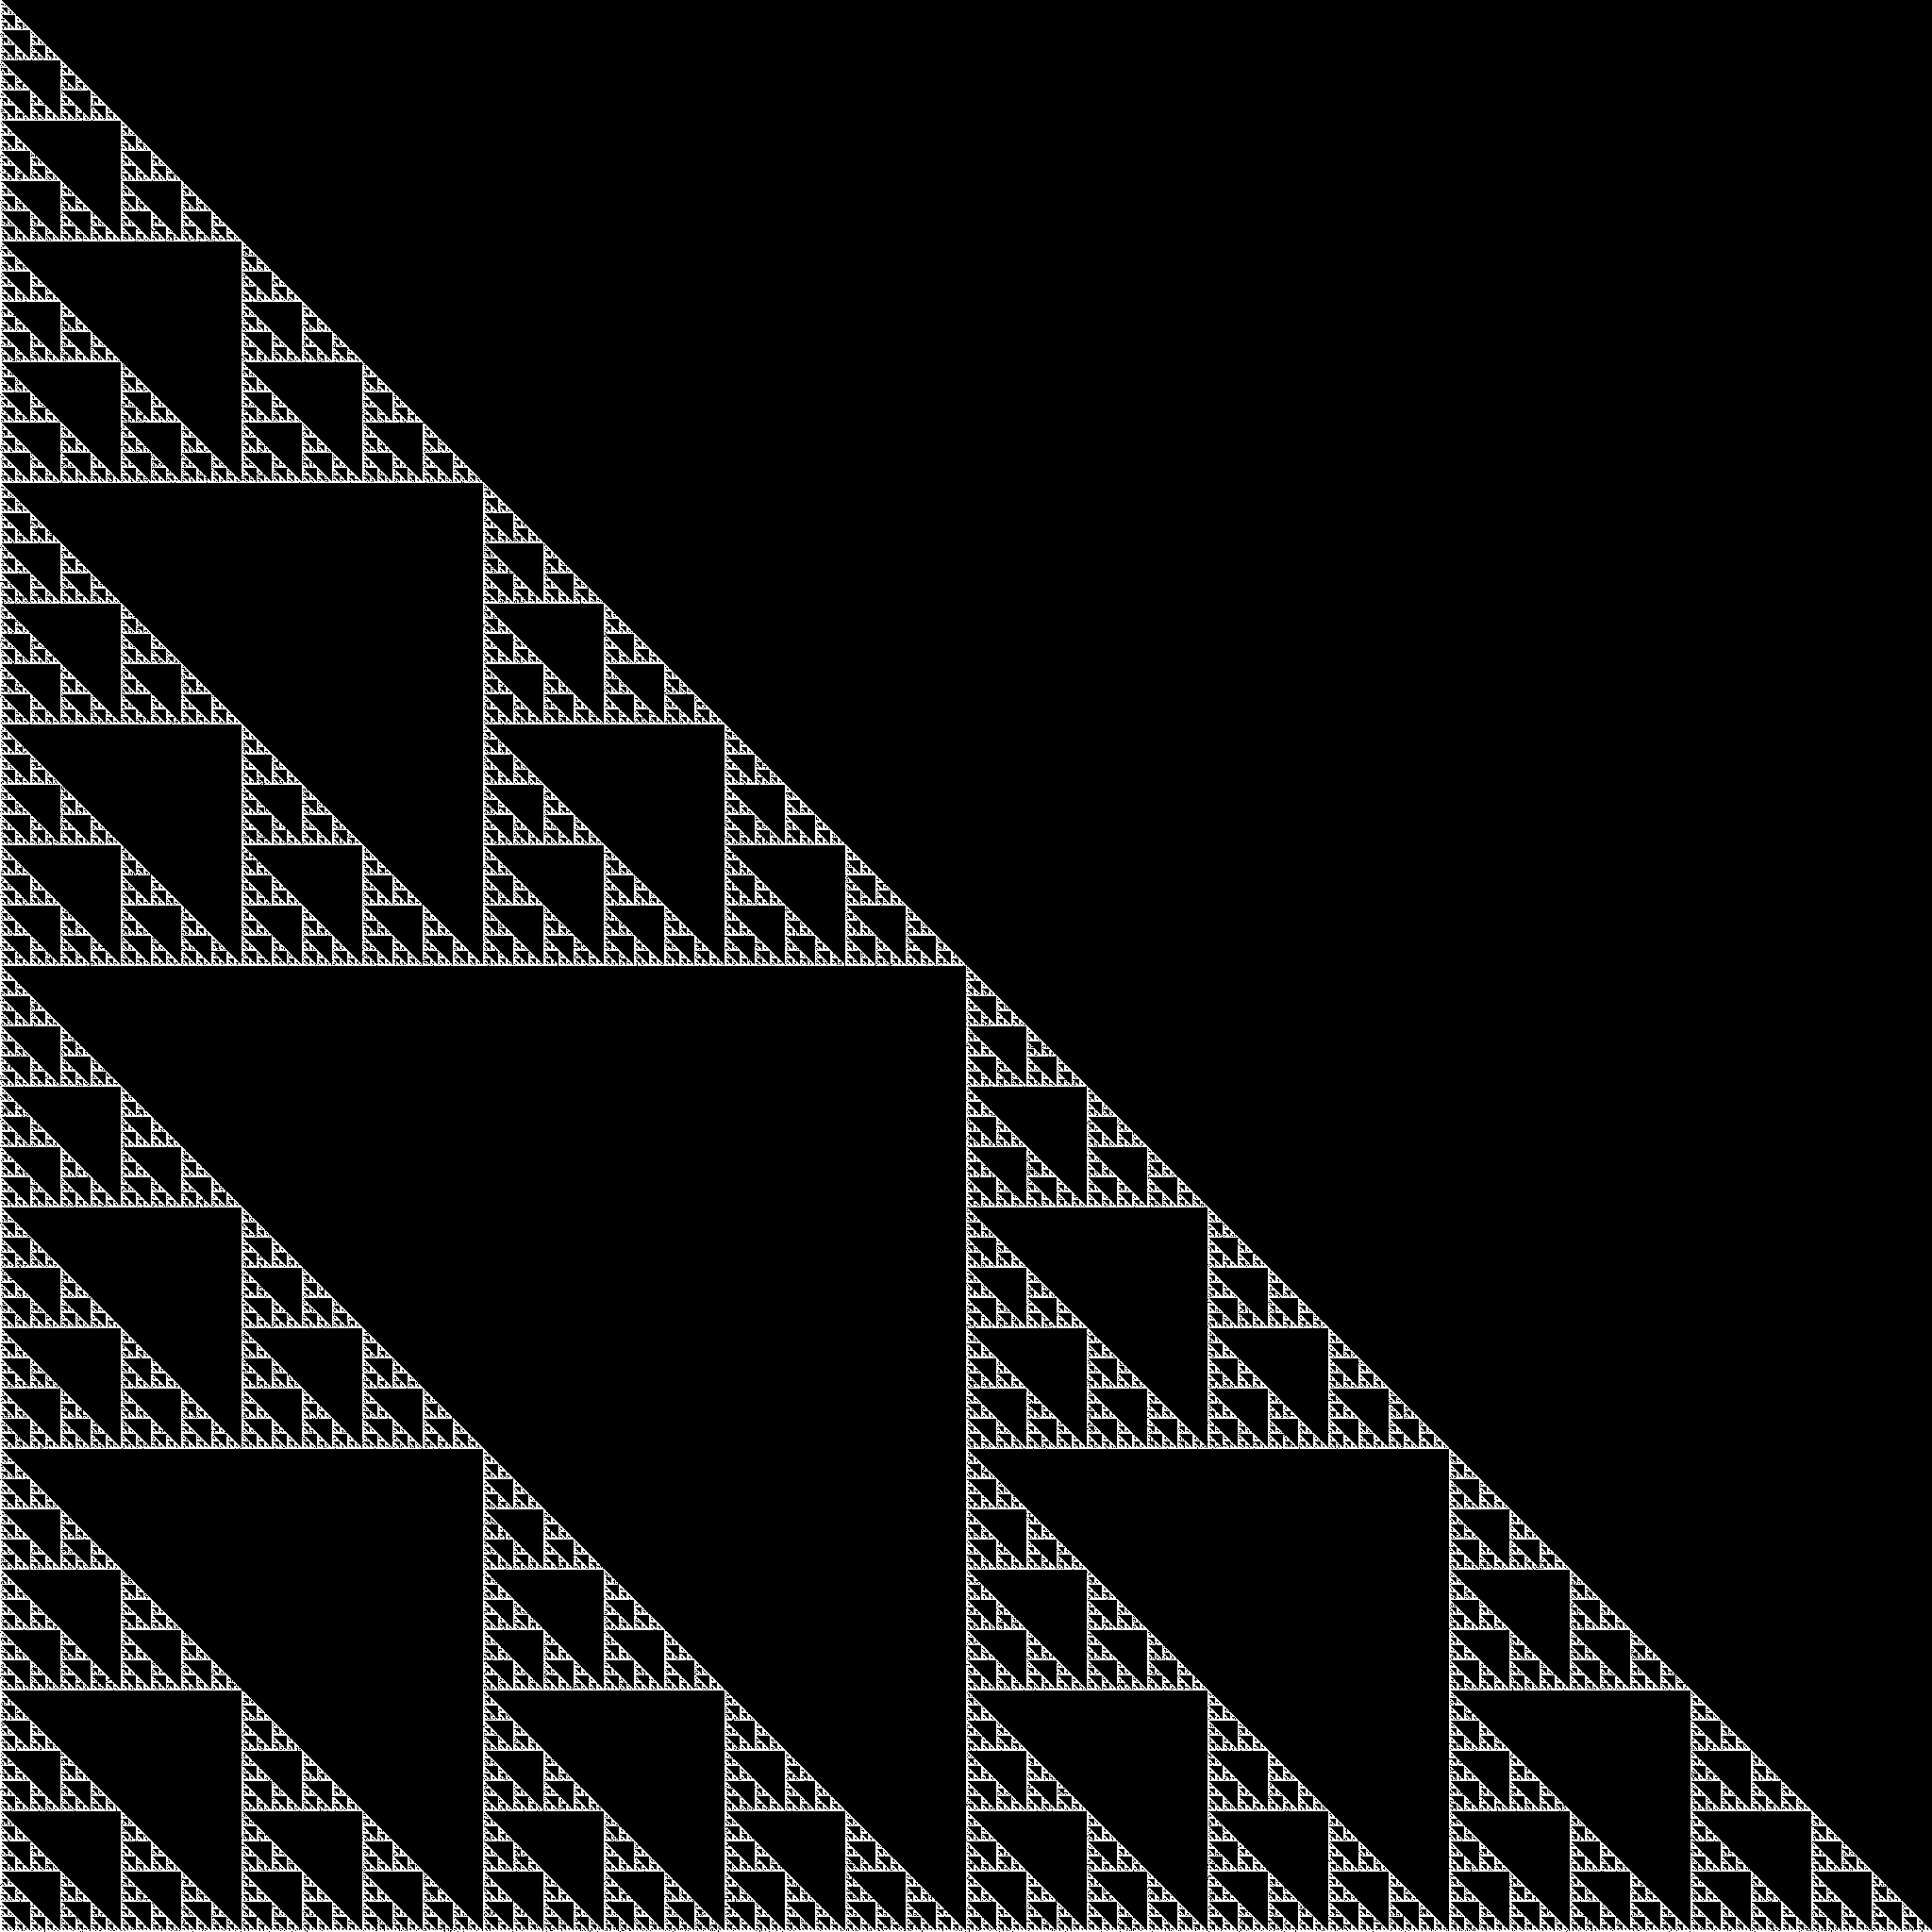

In [79]:
ifsp(points, transformations, None, iterations=1000000)

In [80]:
transformations = [{'a': 0.255, 'b': 0.0, 'c': 0.0, 'd': 0.255, 'e': 0.3726, 'f': 0.6714},
                   {'a': 0.255, 'b': 0.0, 'c': 0.0, 'd': 0.255, 'e': 0.1146, 'f': 0.2232},
                   {'a': 0.255, 'b': 0.0, 'c': 0.0, 'd': 0.255, 'e': 0.6306, 'f': 0.2232},
                   {'a': 0.370, 'b': -0.642, 'c': 0.642, 'd': 0.370, 'e': 0.6356, 'f': -0.0061}]

  0%|          | 0/1000000 [00:00<?, ?it/s]

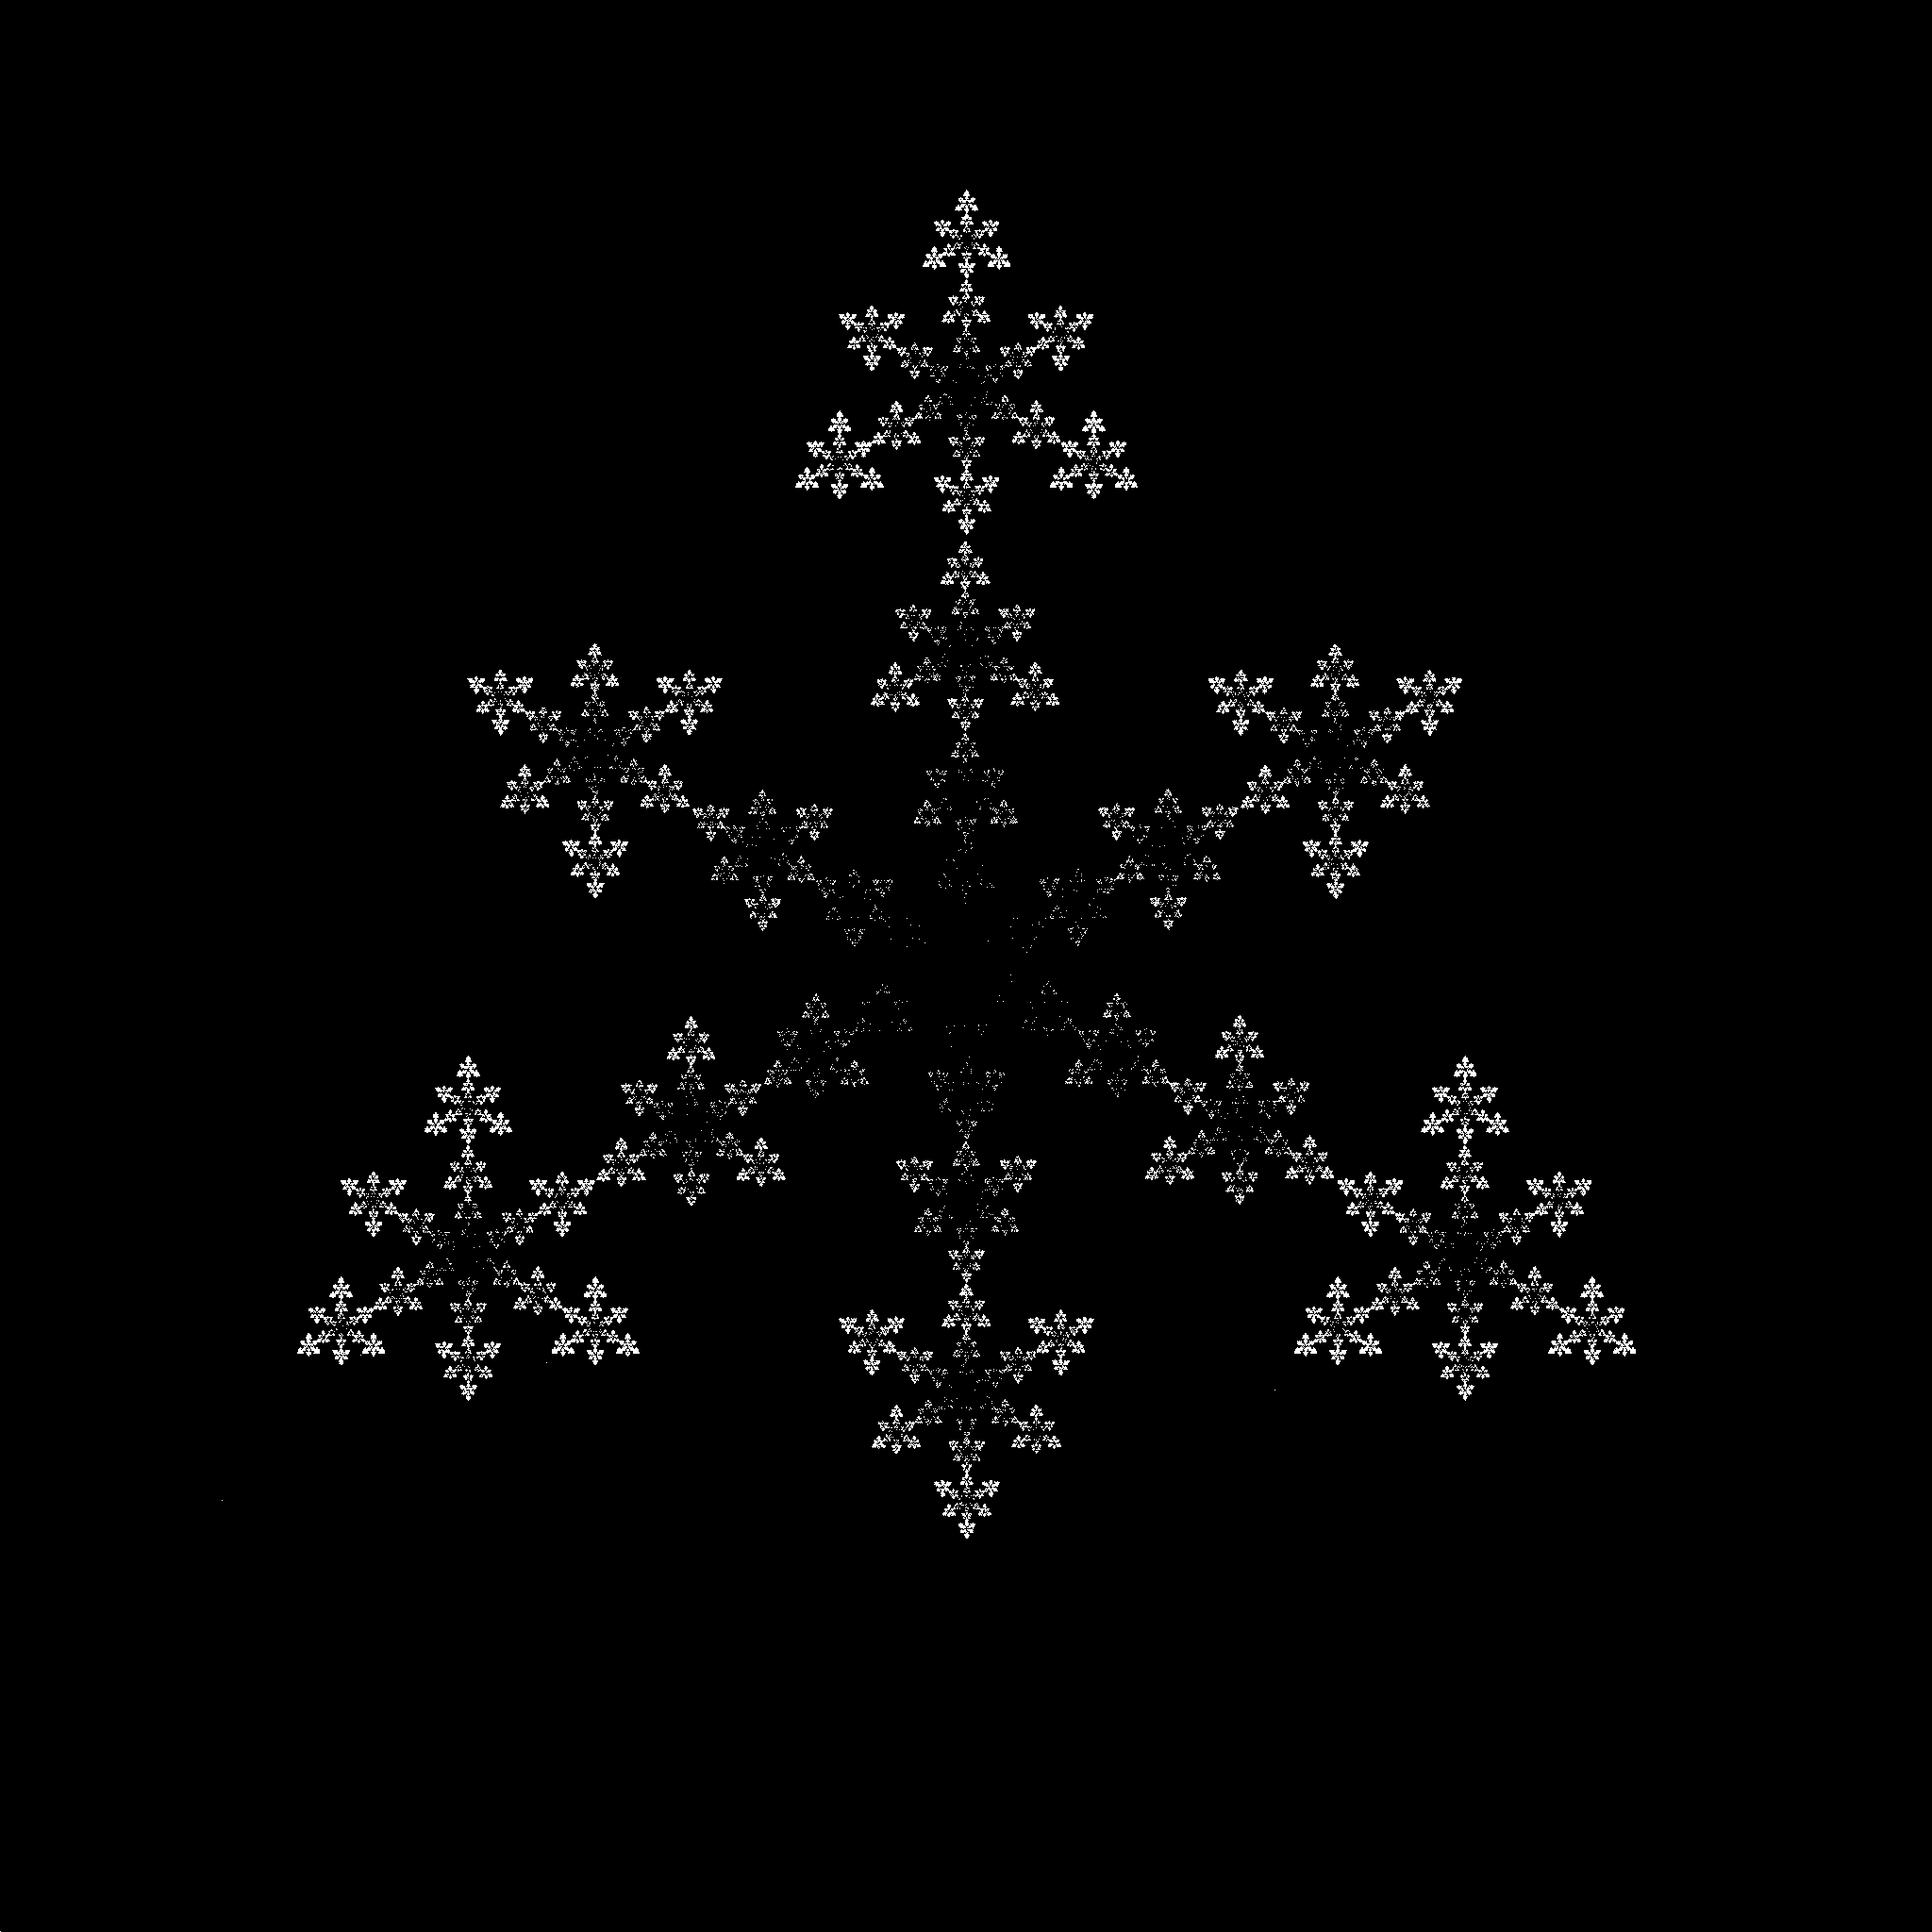

In [81]:
ifsp(points, transformations, None, iterations=1000000)

In [82]:
transformations = [{'a': 0.195, 'b': -0.488, 'c': 0.344, 'd': 0.433, 'e': 0.4431, 'f': 0.2452},
                   {'a': 0.462, 'b': 0.414, 'c': -0.252, 'd': 0.361, 'e': 0.2511, 'f': 0.5692},
                   {'a': -0.058, 'b': -0.070, 'c': 0.453, 'd': -0.111, 'e': 0.5976, 'f': 0.0969},
                   {'a': -0.035, 'b': 0.07, 'c': -0.469, 'd': -0.022, 'e': 0.4884, 'f': 0.5069},
                   {'a': -0.637, 'b': 0.0, 'c': 0.0, 'd': 0.501, 'e': 0.8562, 'f': 0.2513}]

  0%|          | 0/1000000 [00:00<?, ?it/s]

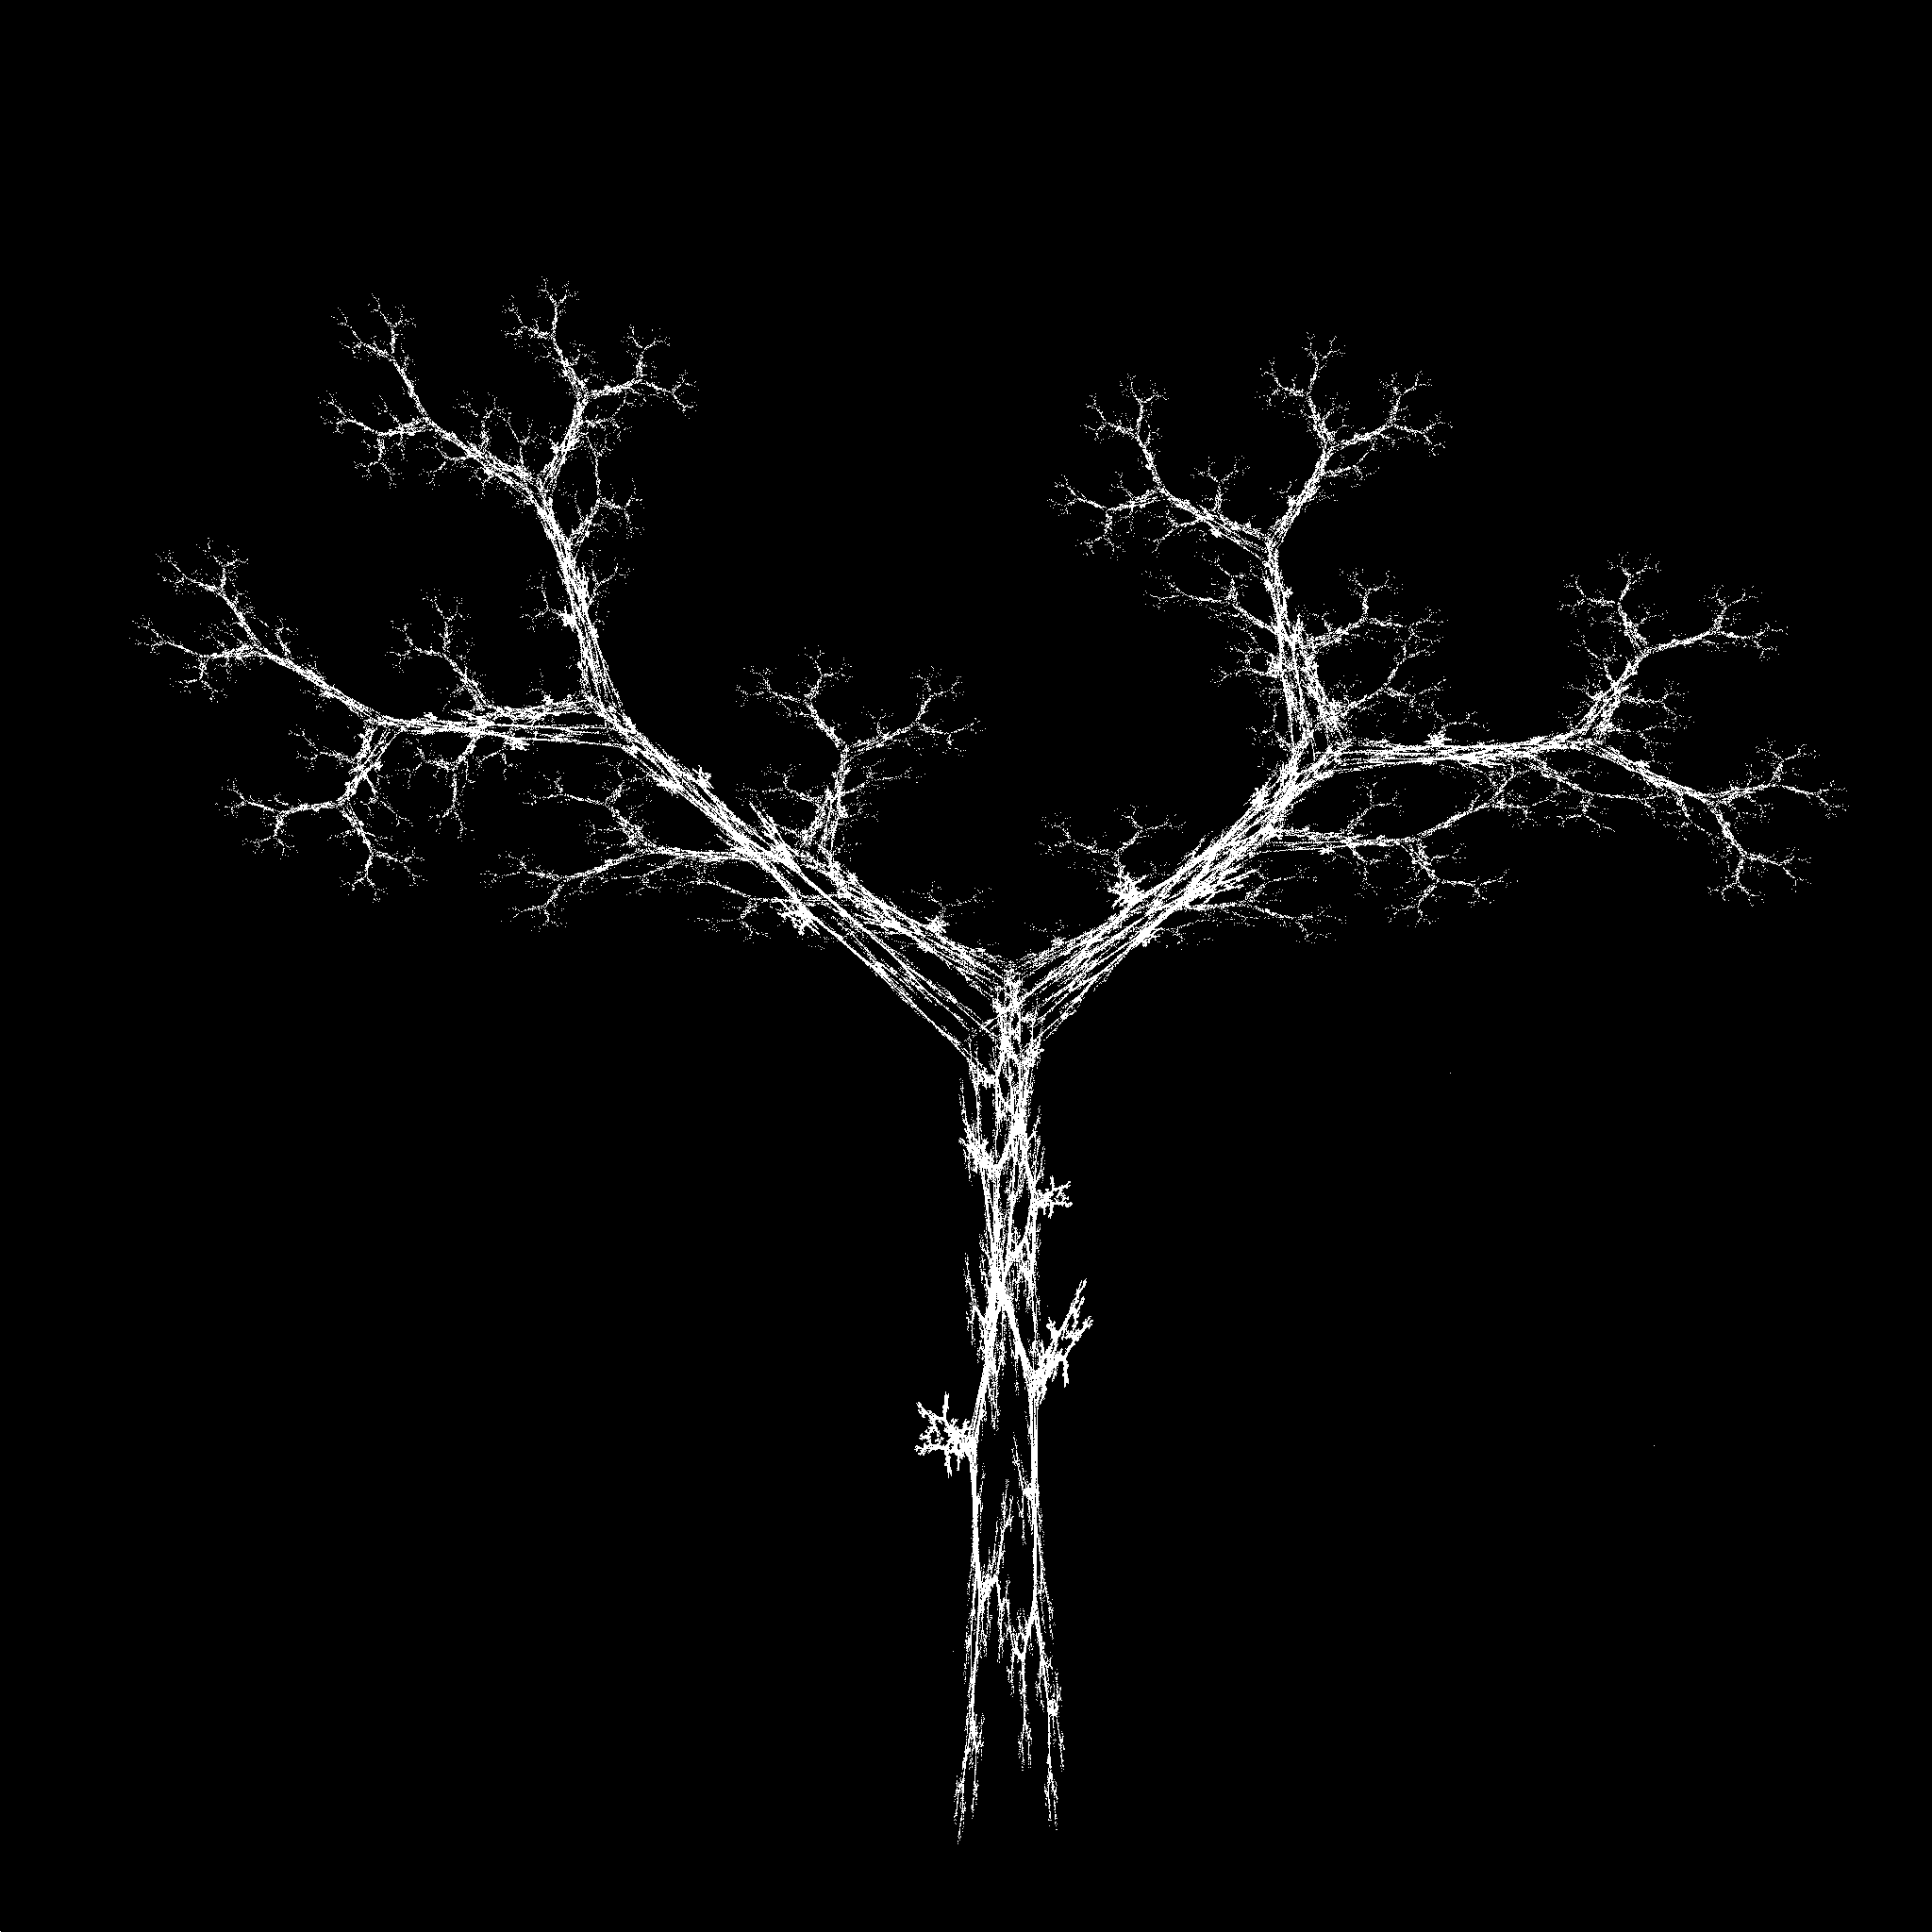

In [83]:
ifsp(points, transformations, None, iterations=1000000)

Wszystkie konfiguracje zachowały swoje atraktory, ale niektóre z nich nie są zadowalające, ponieważ zawierają braki, które można naprawić przy użycie "dostrojonej" ruletki.

**2. Eksperymentując  z  rozkładem  prawdopodobieństwa pi wygeneruj  po  3  warianty danego atraktora (przedstaw wizualizację wraz z komentarzem).**

In [105]:
transformations = [{'a': 0.849, 'b': 0.037, 'c': -0.037, 'd': 0.849, 'e': 0.075, 'f': 0.1830},
                   {'a': 0.197, 'b': -0.226, 'c': 0.226, 'd': 0.197, 'e': 0.400, 'f': 0.049},
                   {'a': -0.150, 'b': 0.283, 'c': 0.260, 'd': 0.237, 'e': 0.575, 'f': -0.084},
                   {'a': 0.0, 'b': 0.0, 'c': 0.0, 'd': 0.16, 'e': 0.500, 'f': 0.040}]

  0%|          | 0/1000000 [00:00<?, ?it/s]

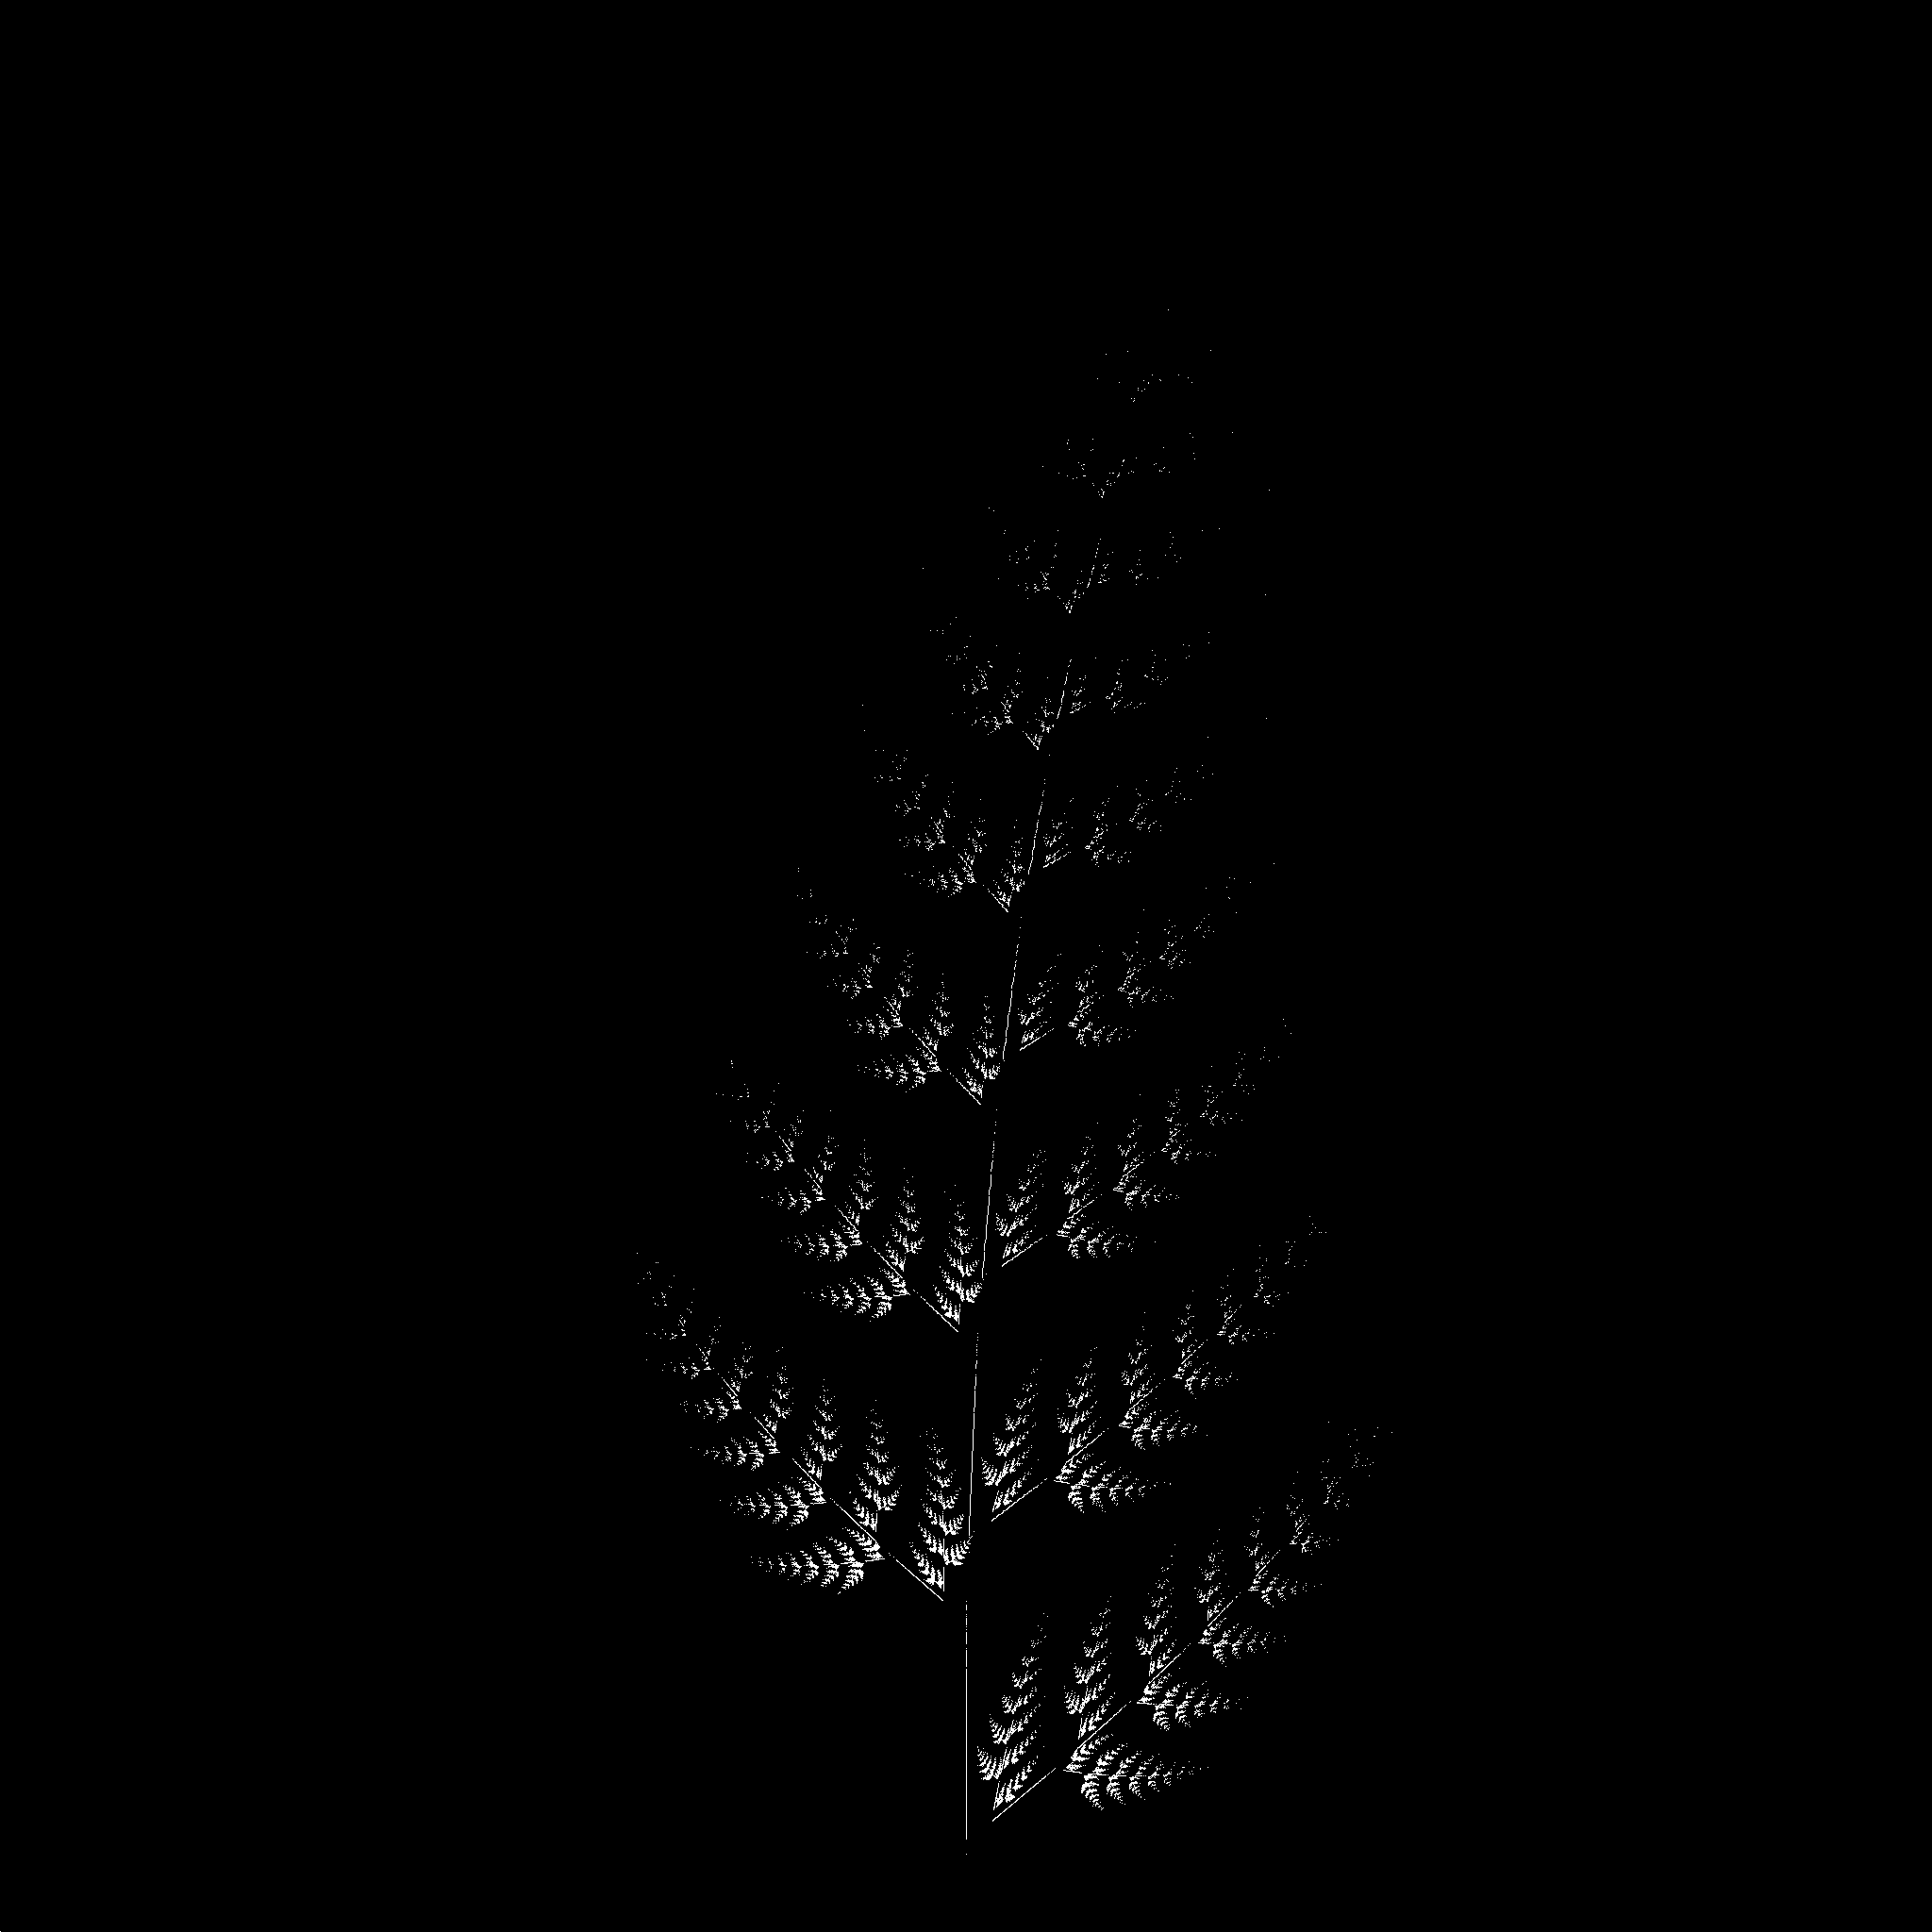

In [109]:
ifsp(points, transformations, None, iterations=1000000)

  0%|          | 0/1000000 [00:00<?, ?it/s]

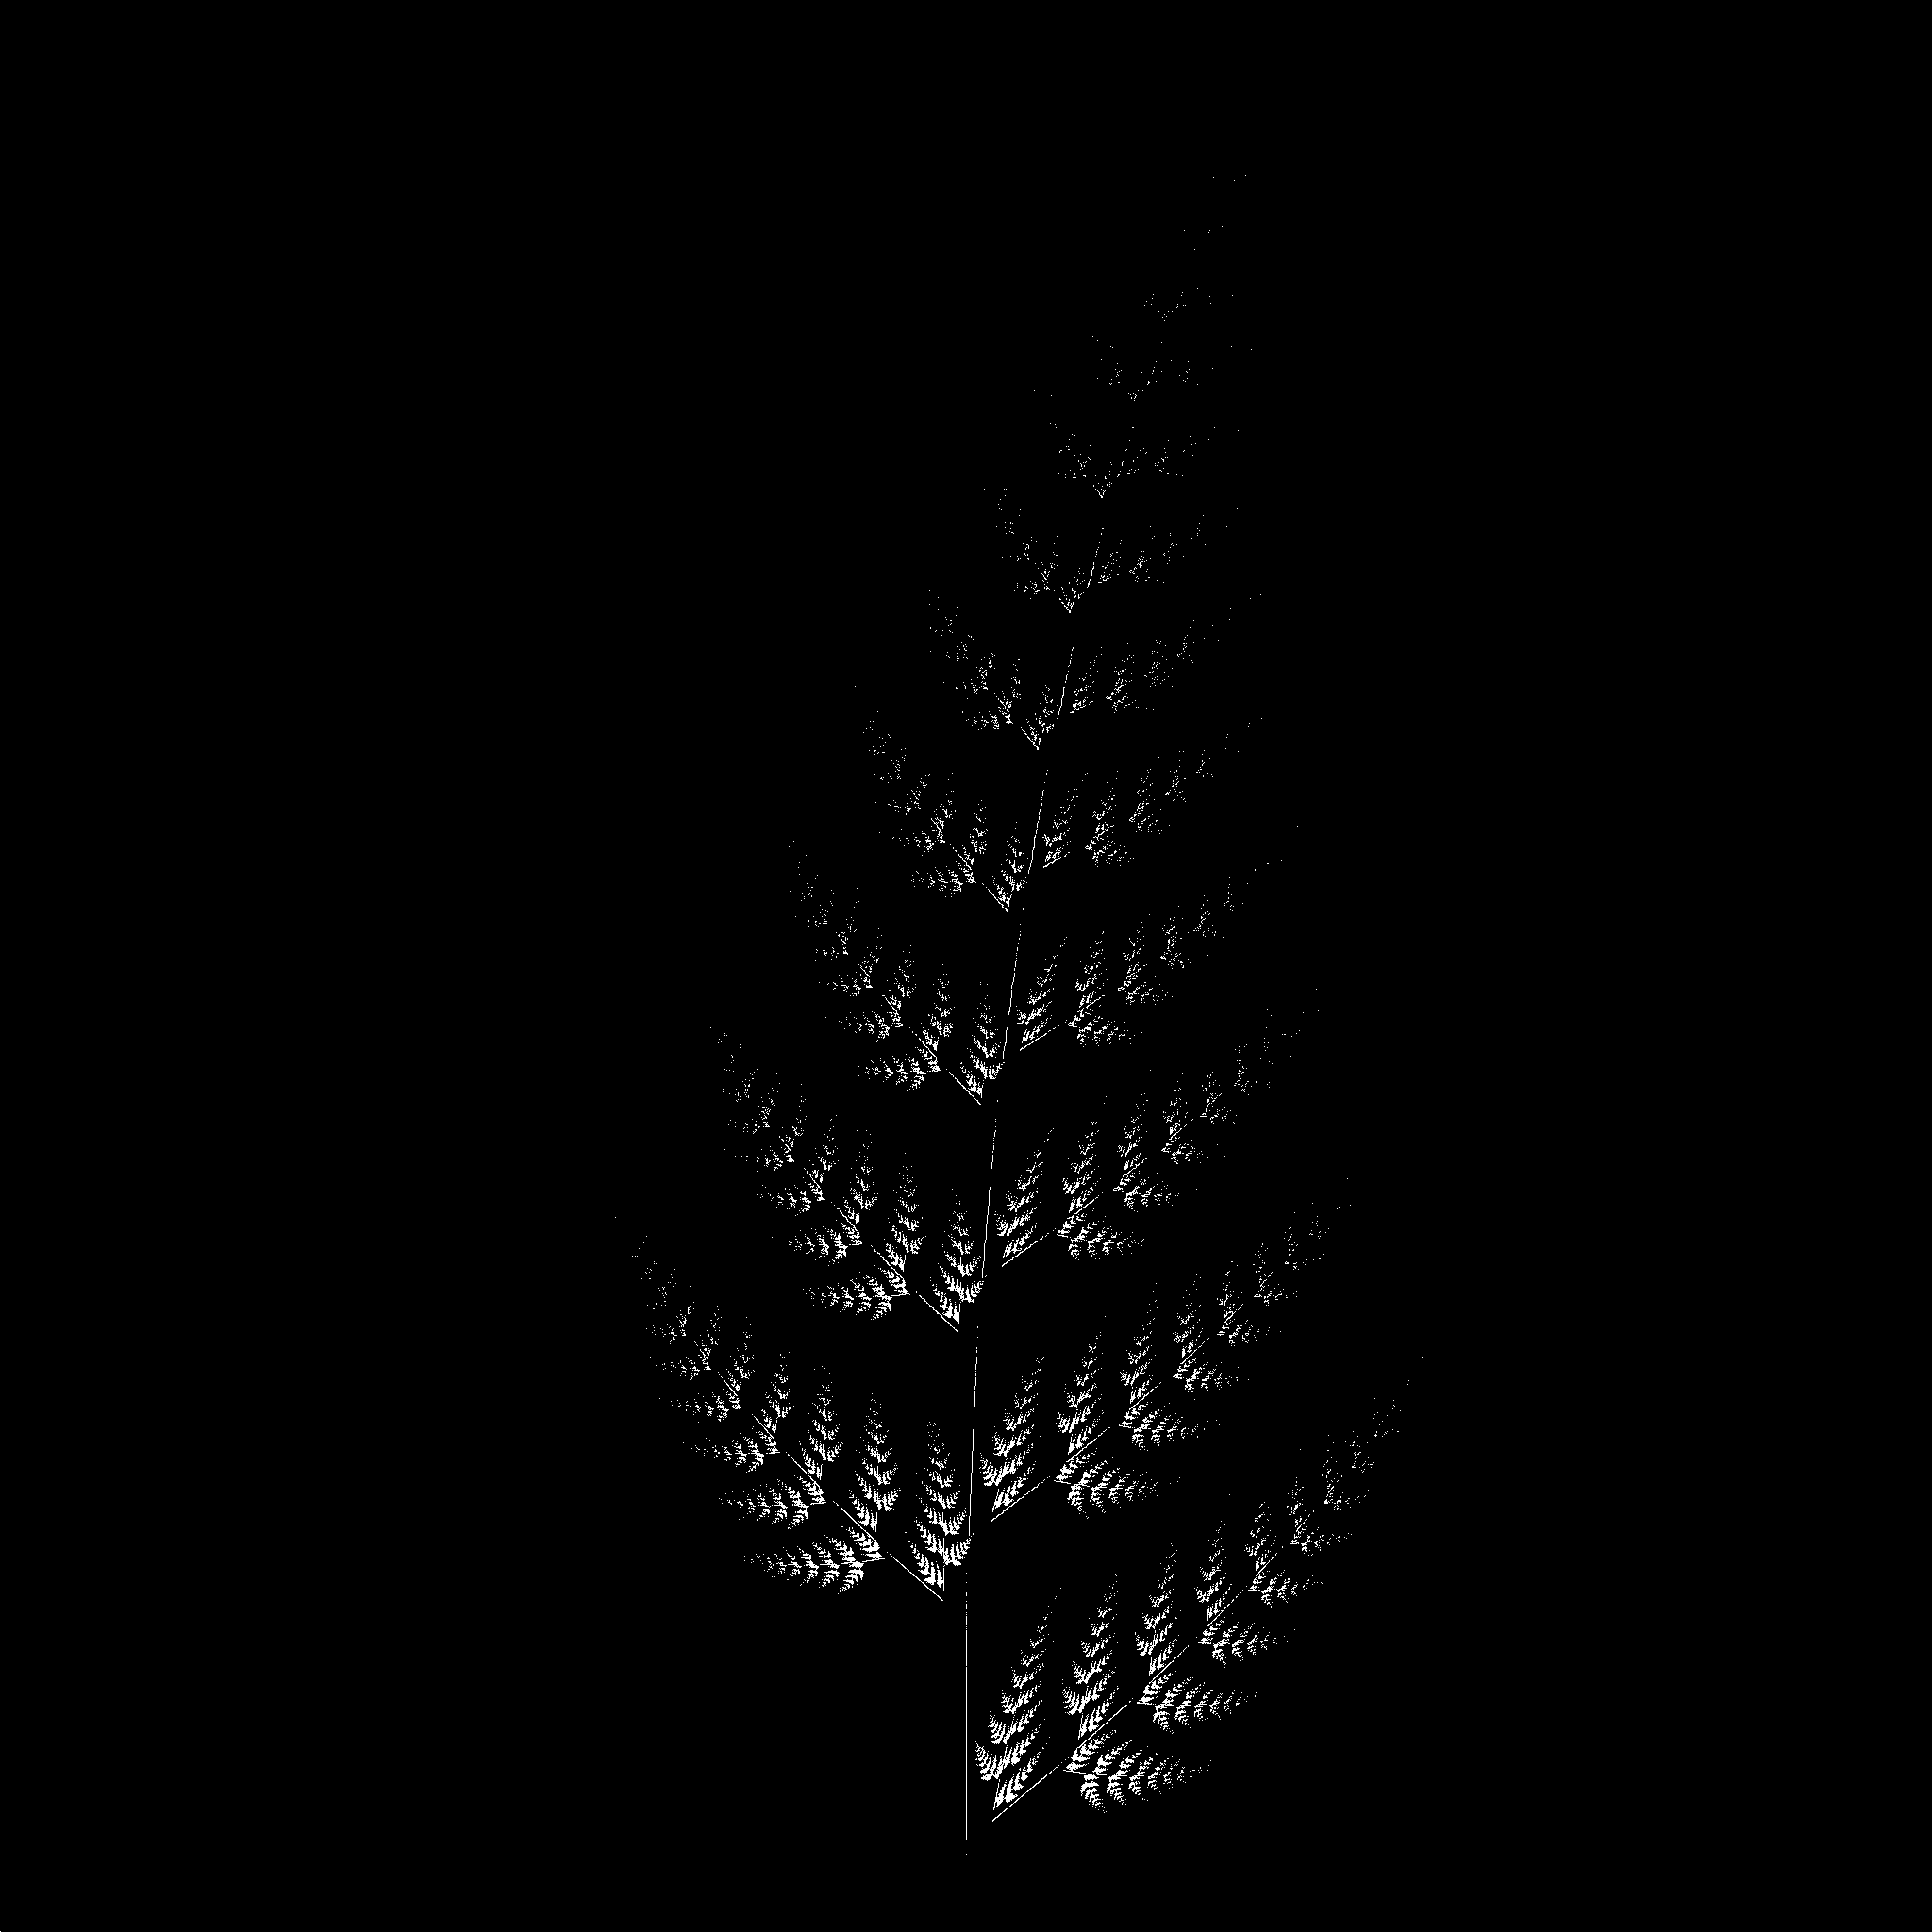

In [106]:
probability_weights = (0.3, 0.2, 0.3, 0.2)
ifsp(points, transformations, probability_weights, iterations=1000000)

  0%|          | 0/1000000 [00:00<?, ?it/s]

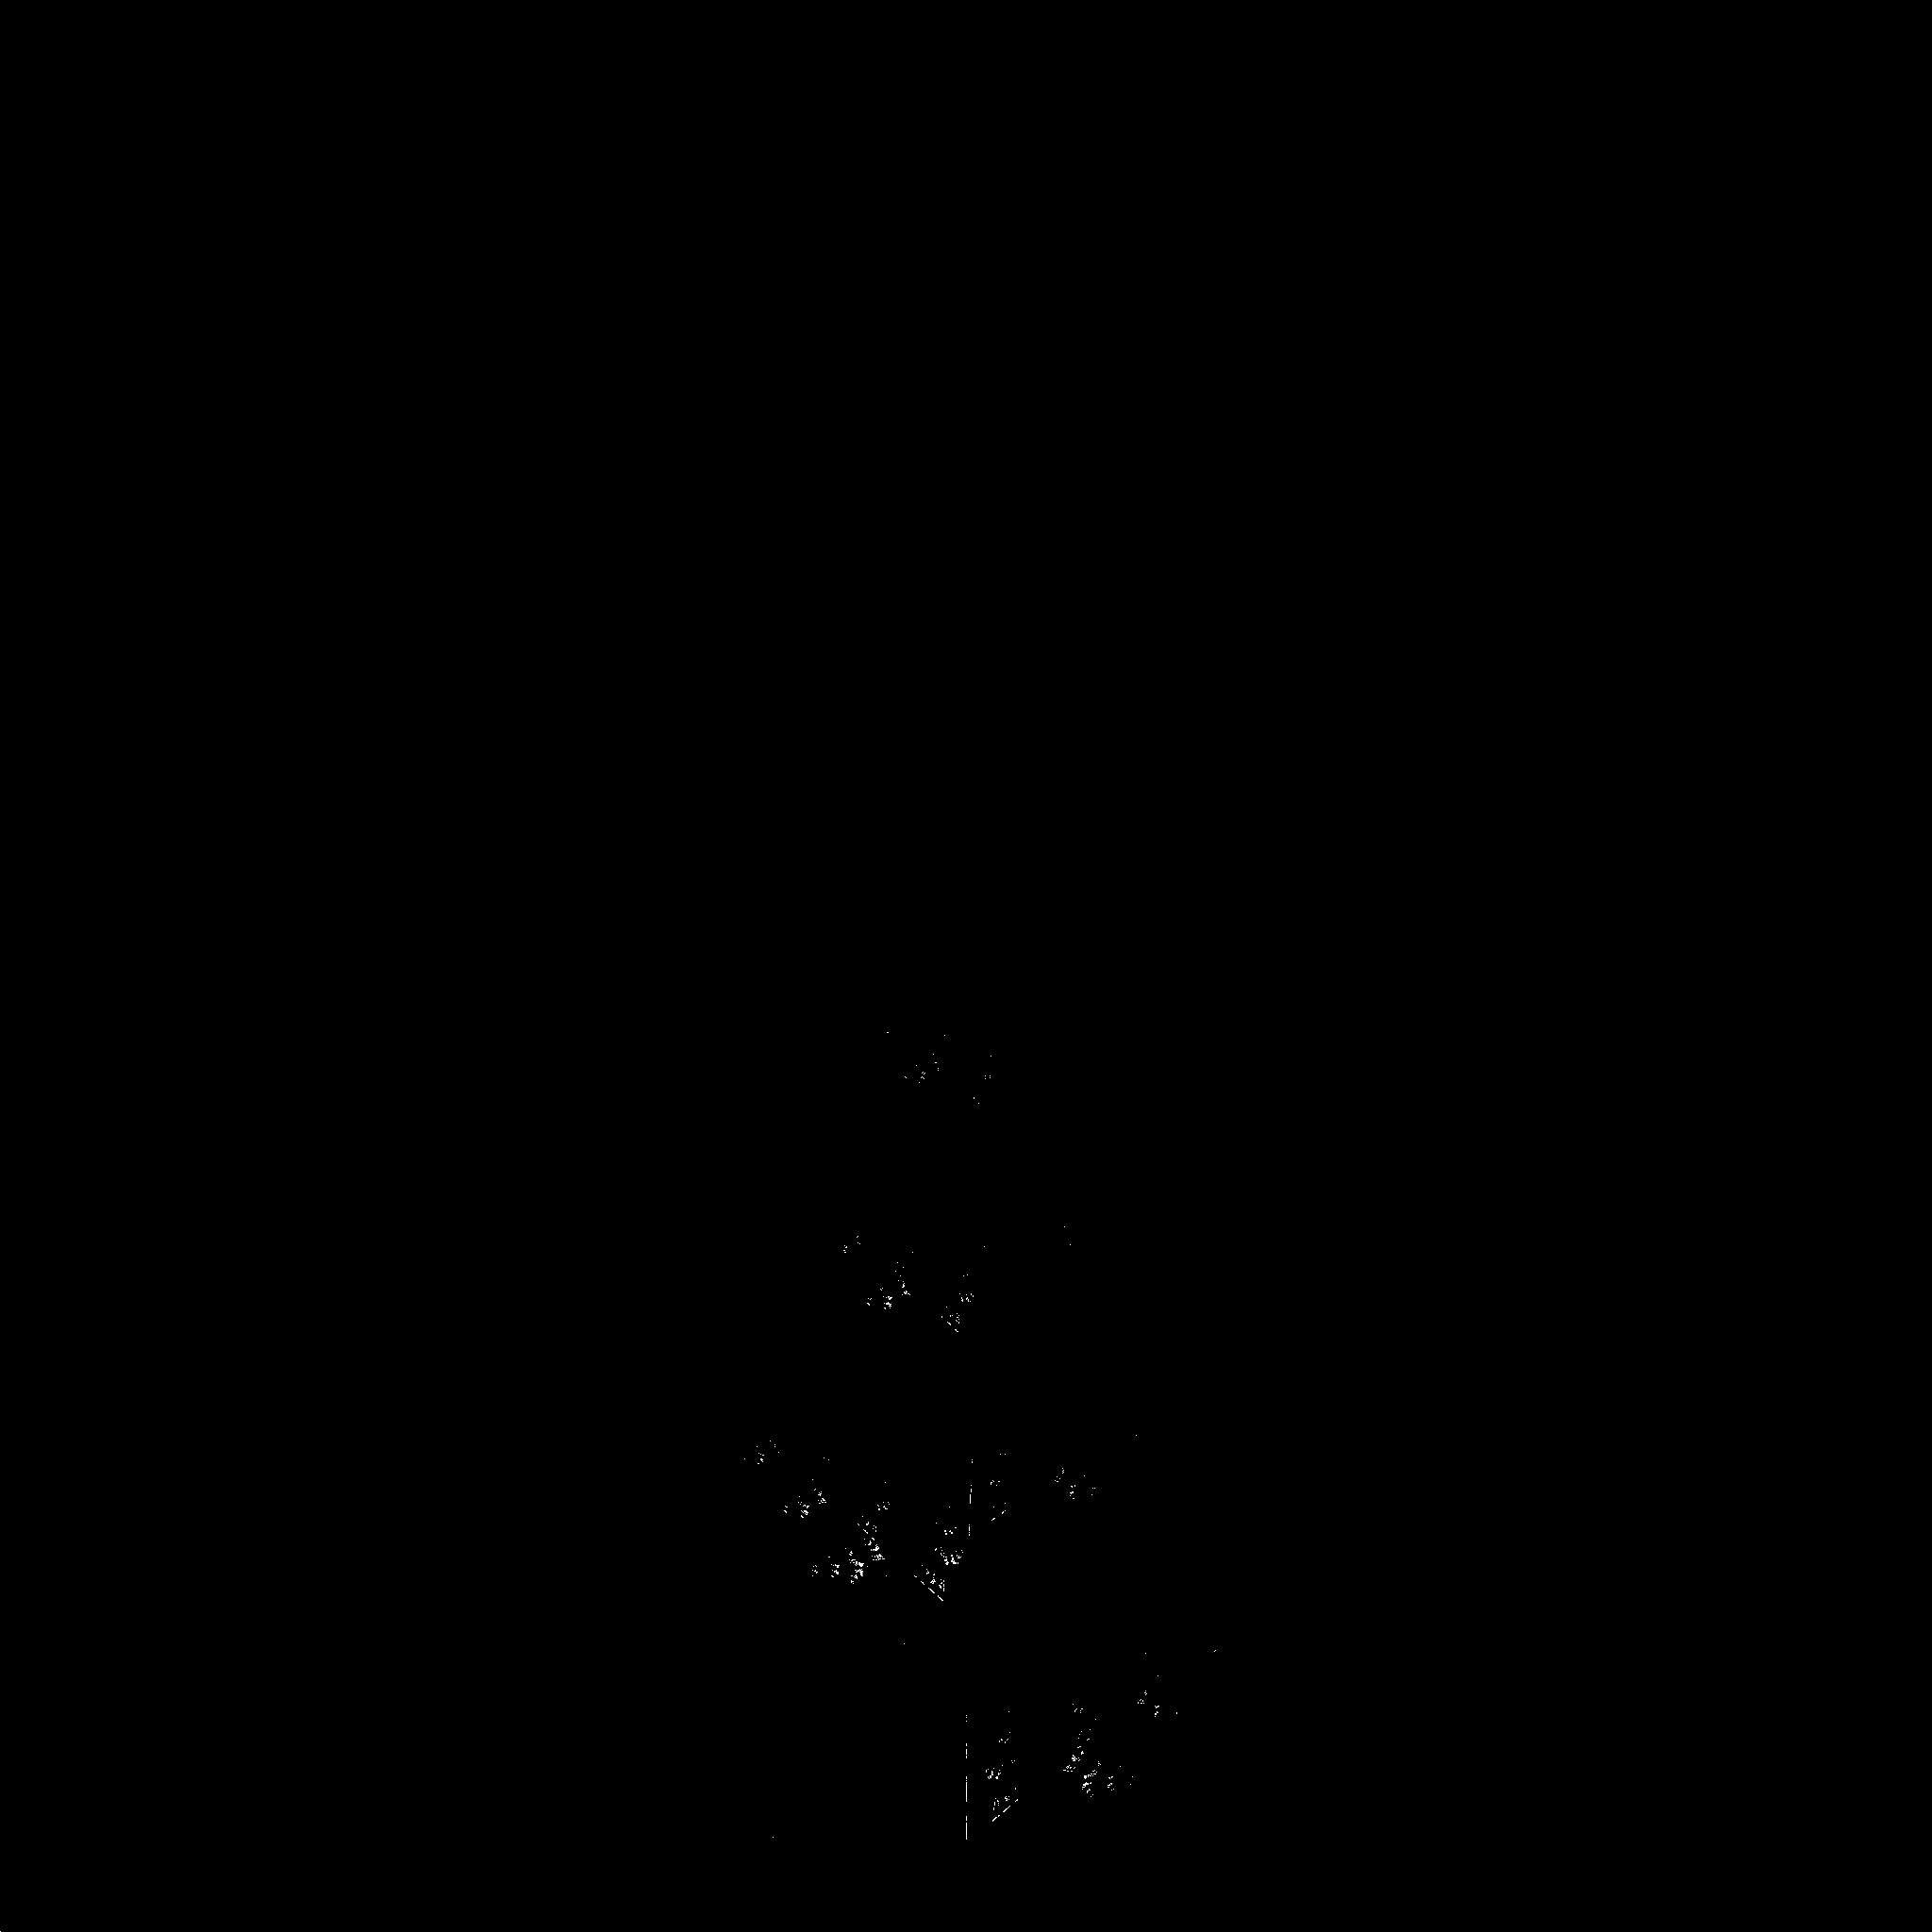

In [107]:
probability_weights = (0.01, 0.85, 0.07, 0.07)
ifsp(points, transformations, probability_weights, iterations=1000000)

  0%|          | 0/1000000 [00:00<?, ?it/s]

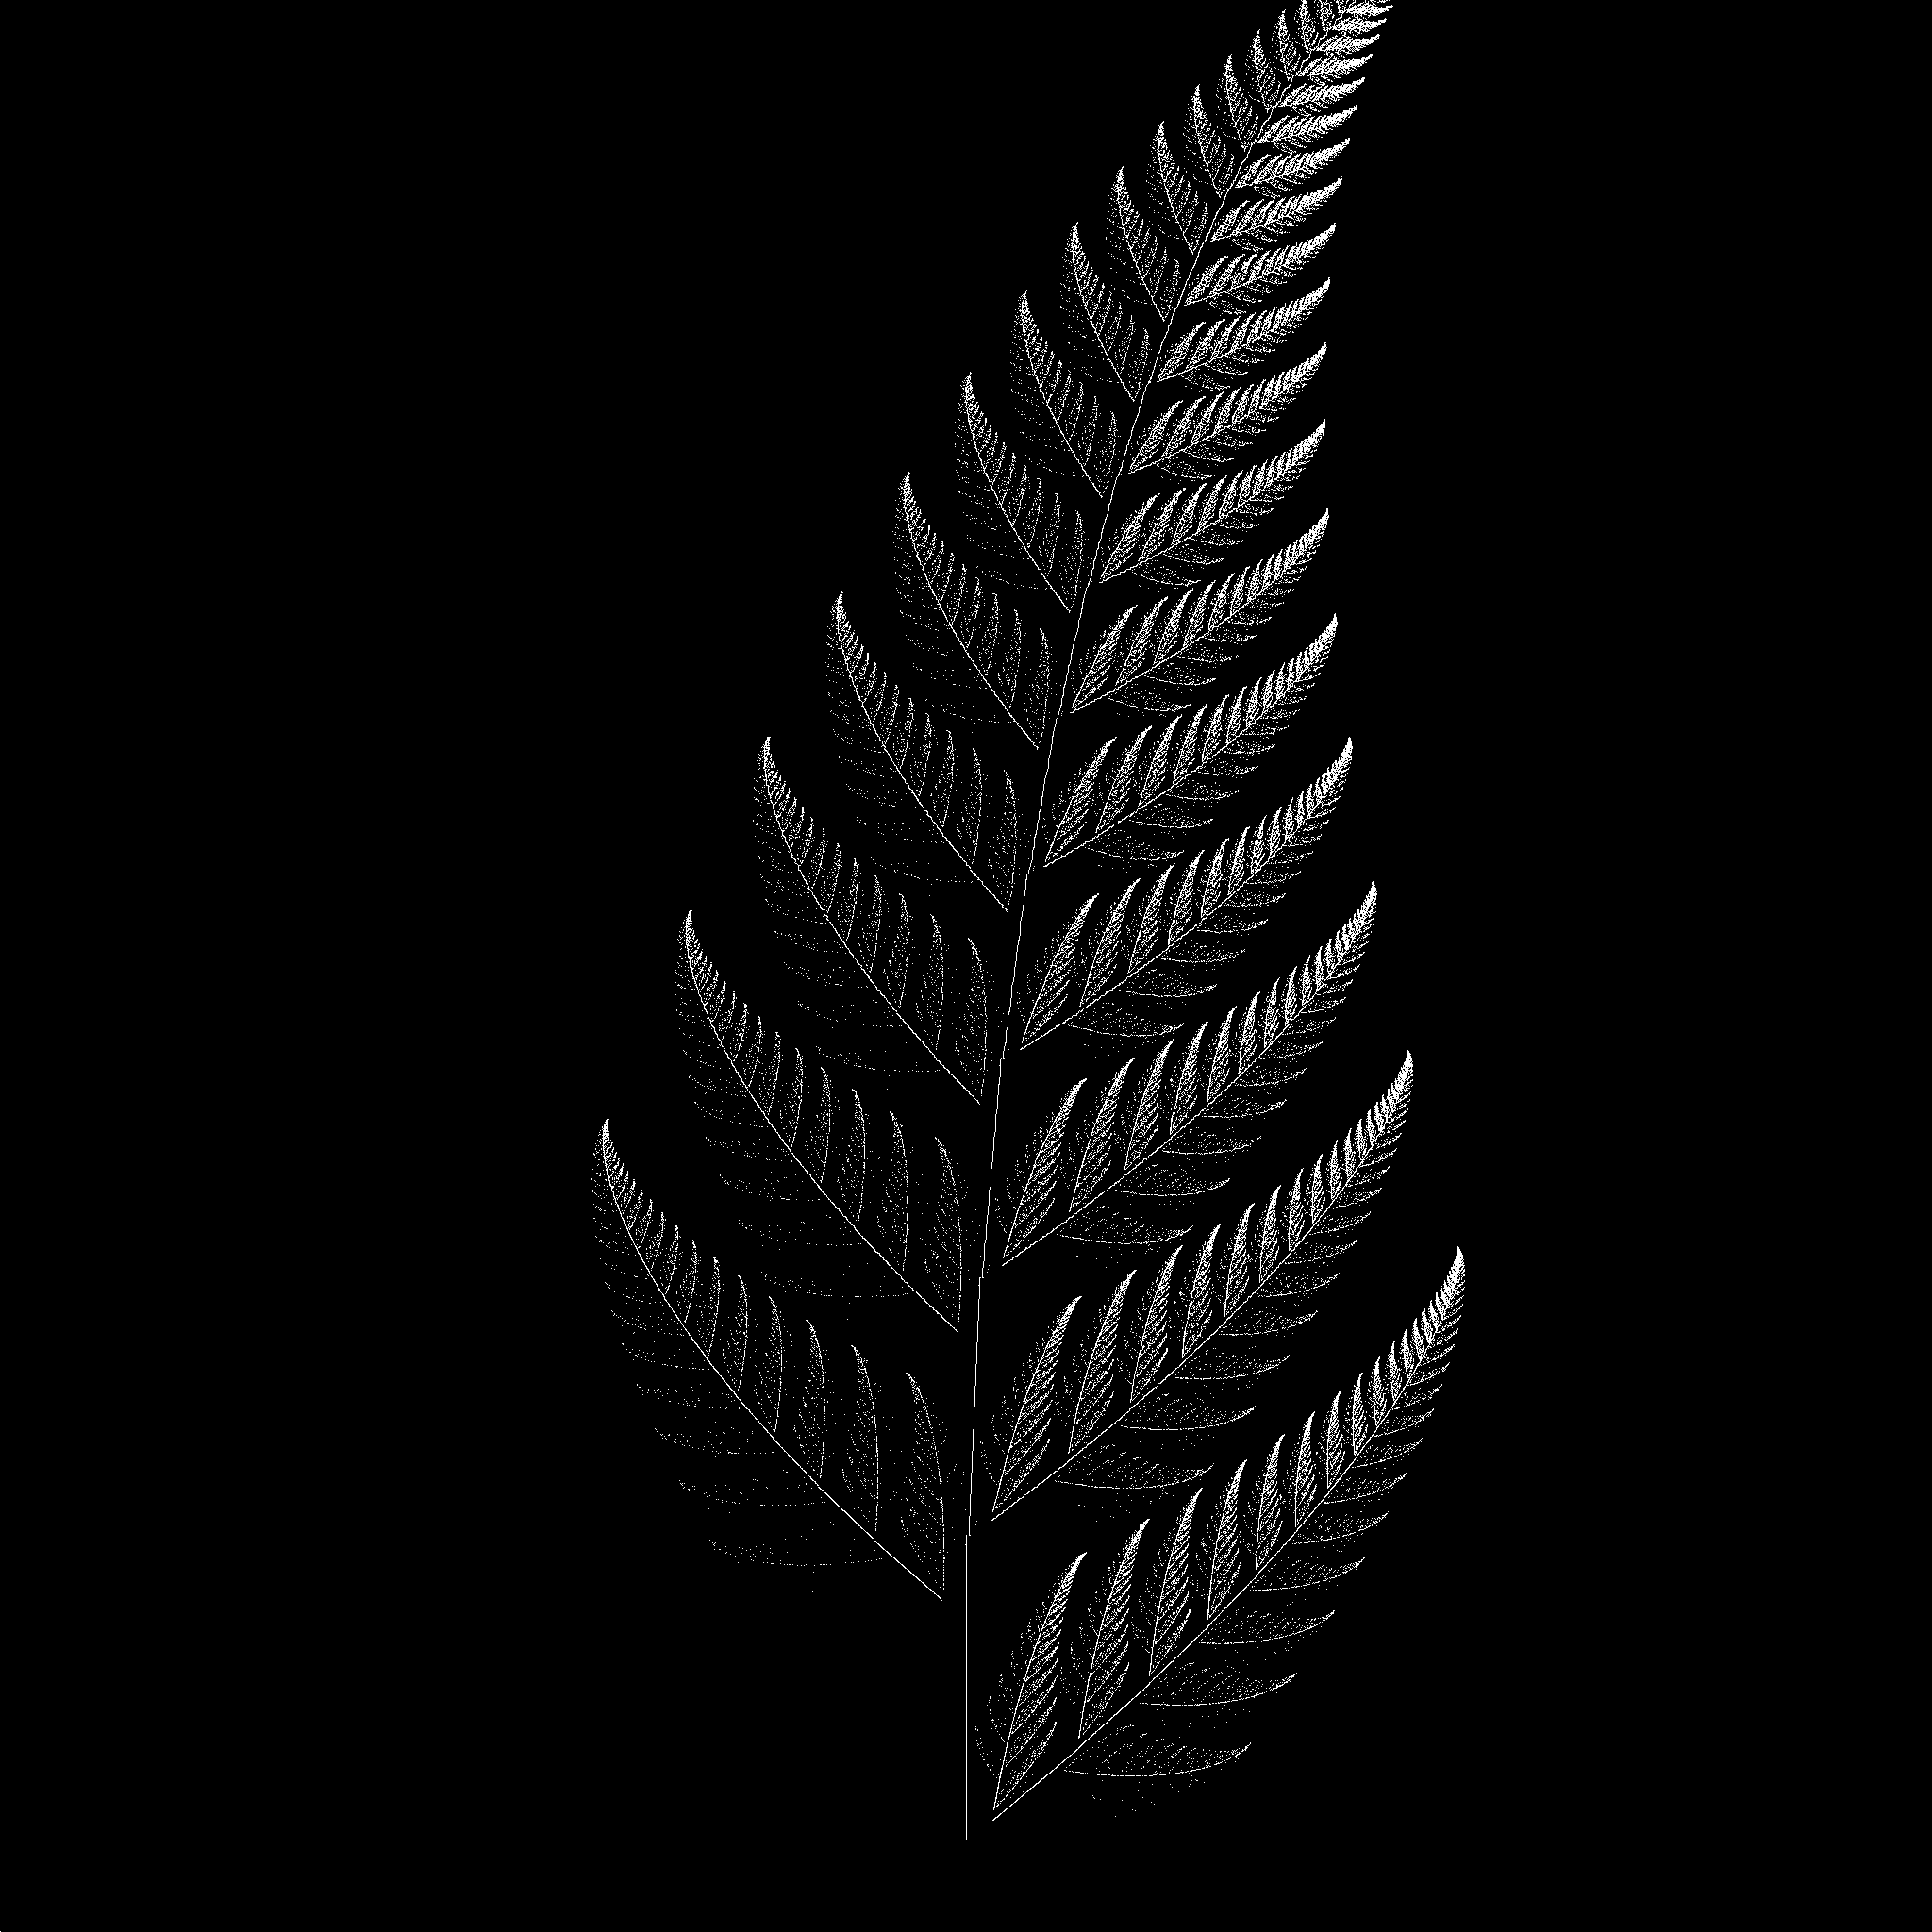

In [108]:
probability_weights = (0.85, 0.01, 0.07, 0.07)
ifsp(points, transformations, probability_weights, iterations=1000000)

Najlepszy rysunek wyszedł przy prawdopodobieństwach (0.85, 0.01, 0.07, 0.07).
Paprotka nie zawiera już braków, które zawierała przy użyciu równomiernego rozkładu prawdopodobieństw. Stanowi to dowód możliwości tkwiących w grze o chaos. Odpowiednie dobranie rozkładu prawdopodobieństwa może przyspieszyć proces dekodowania z milionów lat do kilku sekund.

Ciąg powstałych punktów powstałych przez kopiarkę wielokrotnie redukującą z ruletką znajdzie się dowolnie blisko każdego punktu atraktora.